In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, validation_curve, cross_val_score, KFold, RepeatedKFold

In [3]:
from palmerpenguins import load_penguins

---
# Question-1
---

### Loading the dataset

In [4]:
df = pd.read_csv('ENB2012_data.csv')

In [5]:
df

X1     X2     X3      X4   X5  X6   X7  X8     Y1
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84
..    ...    ...    ...     ...  ...  ..  ...  ..    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64

[768 rows x 9 columns]

### Preprocessing & Data Analysis

In [6]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64

In [7]:
for each in df.columns:
    print('Number of unique entries in', each, ':', len(df[each].unique()))

Number of unique entries in X1 : 12
Number of unique entries in X2 : 12
Number of unique entries in X3 : 7
Number of unique entries in X4 : 4
Number of unique entries in X5 : 2
Number of unique entries in X6 : 4
Number of unique entries in X7 : 4
Number of unique entries in X8 : 6
Number of unique entries in Y1 : 586


In [8]:
df.columns.tolist()

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1']

In [9]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

In [10]:
X = df[features]

In [11]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled

In [12]:
y = df.Y1

### Splitting

In [13]:
train_X, val_test_X, train_y, val_test_y = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
val_X, test_X, val_y, test_y = train_test_split(val_test_X, val_test_y, test_size=0.666, random_state=0)

### Hyper-parameter Tuning

In [15]:
def trainer(train_X, train_y, val_X, val_y, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    dt = DecisionTreeRegressor(random_state=0, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    dt.fit(train_X, train_y)
    pred_y = dt.predict(val_X)
    return mse(val_y, pred_y)

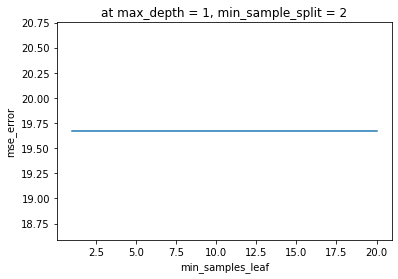

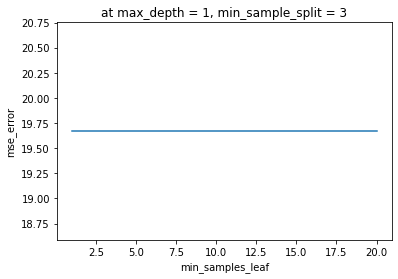

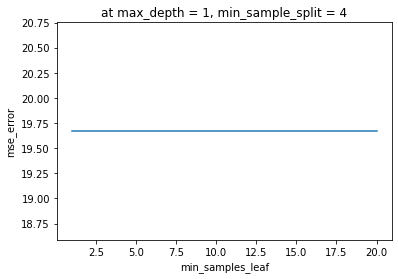

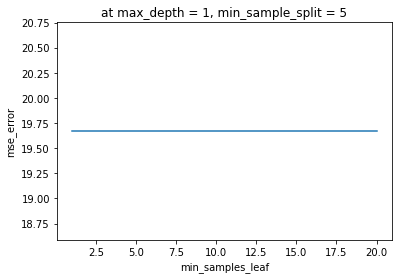

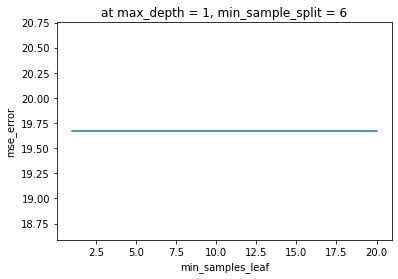

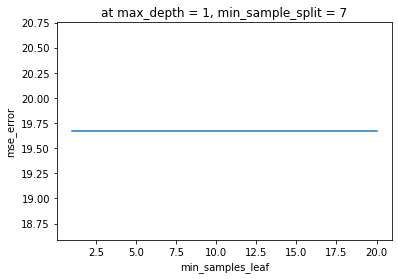

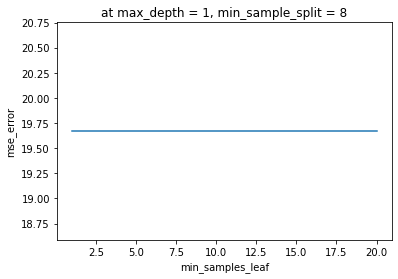

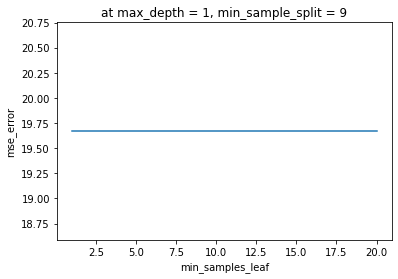

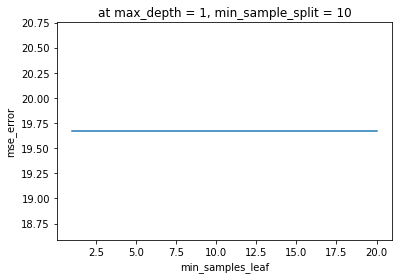

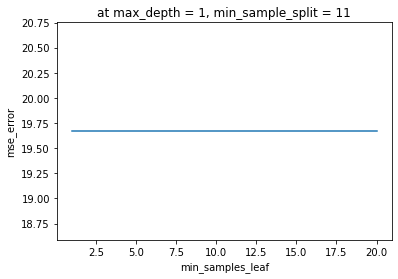

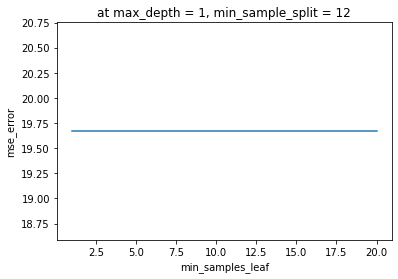

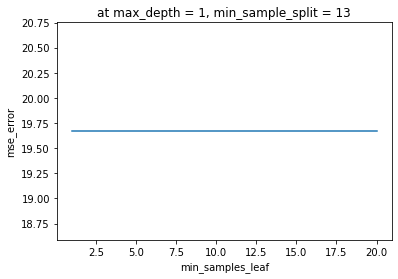

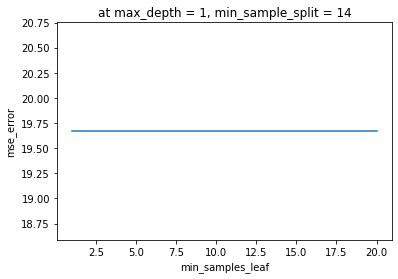

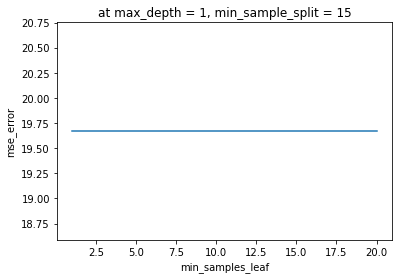

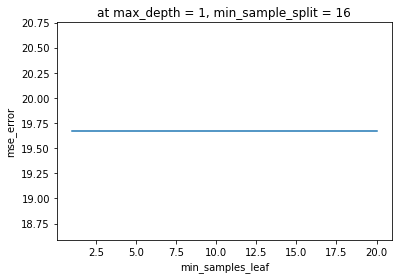

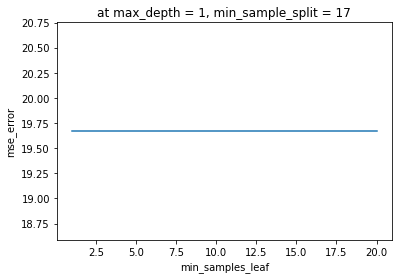

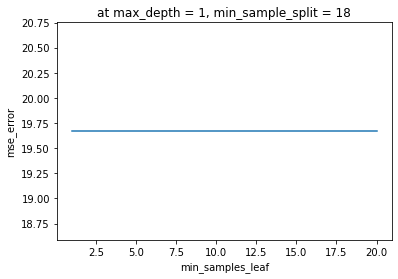

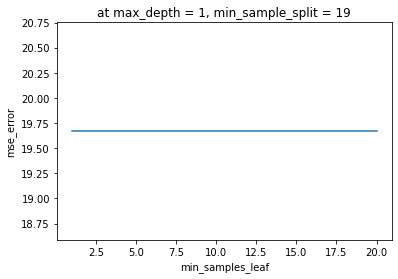

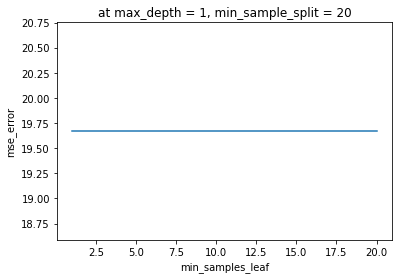

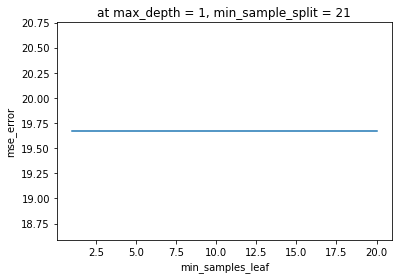

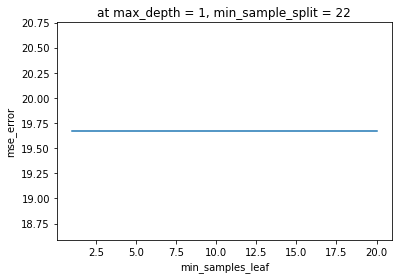

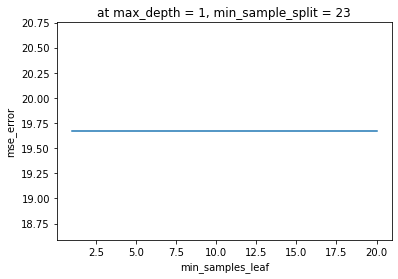

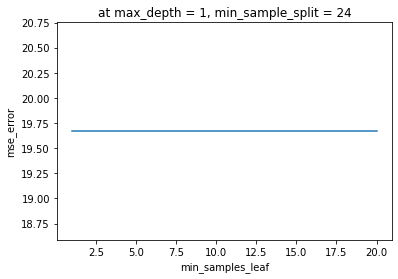

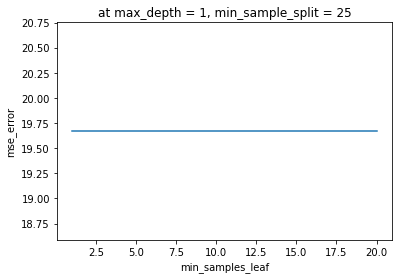

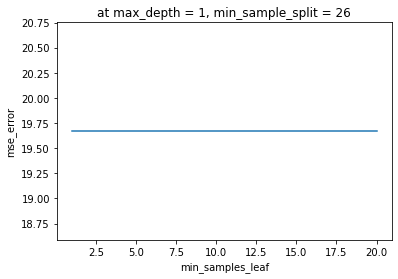

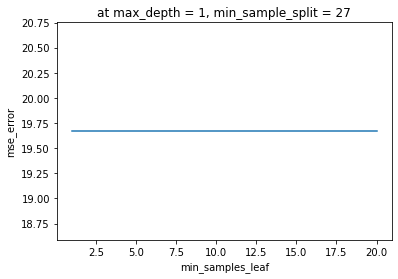

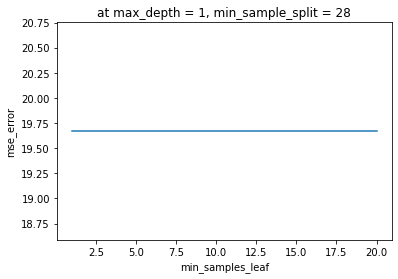

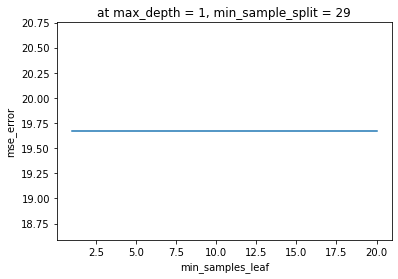

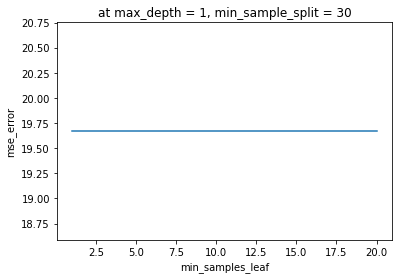

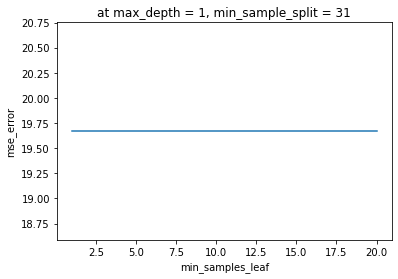

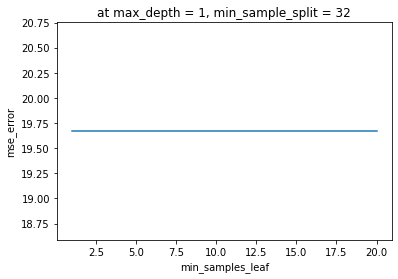

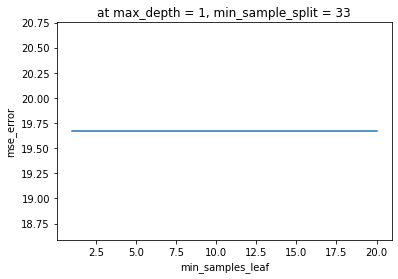

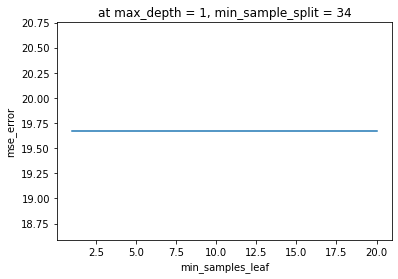

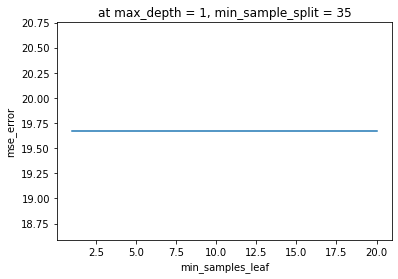

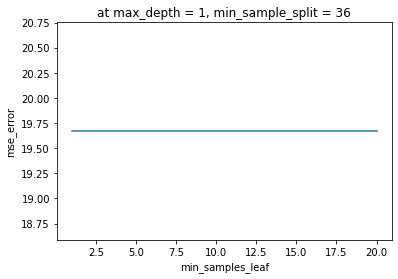

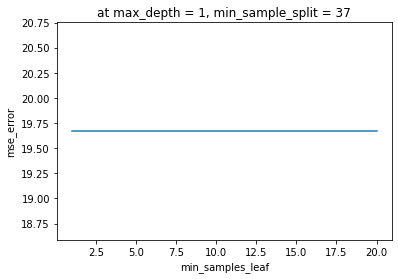

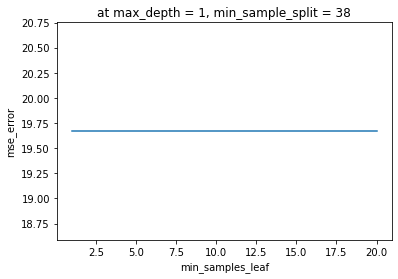

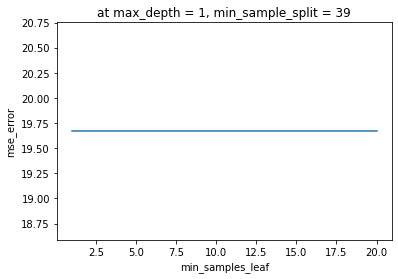

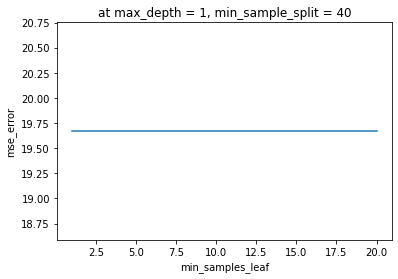

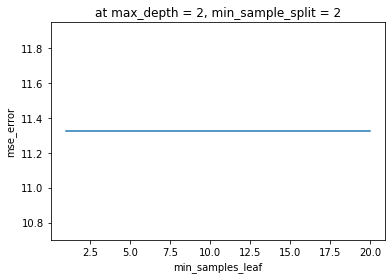

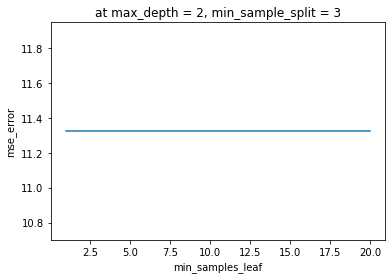

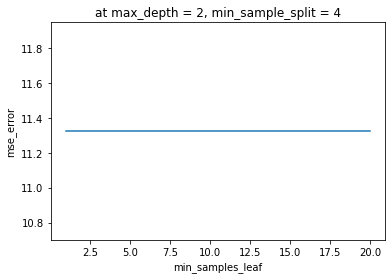

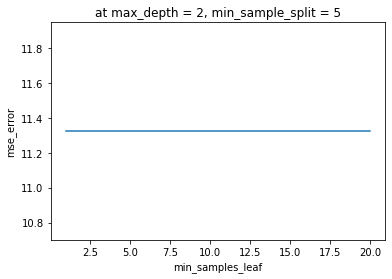

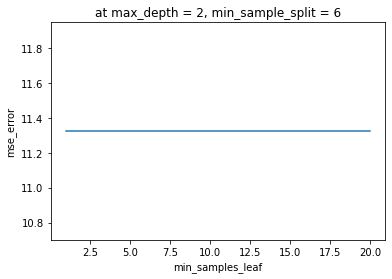

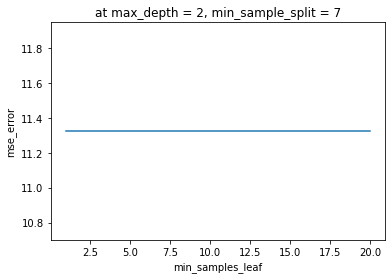

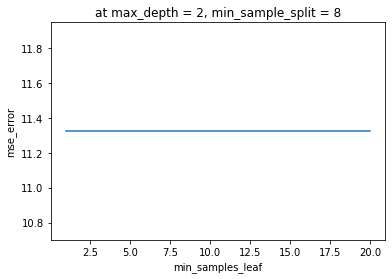

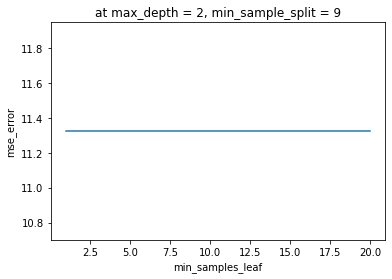

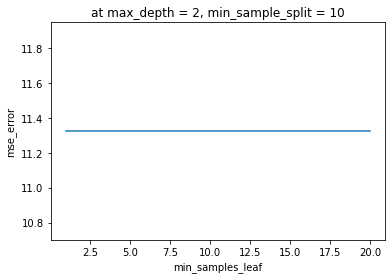

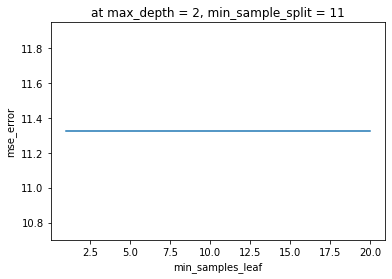

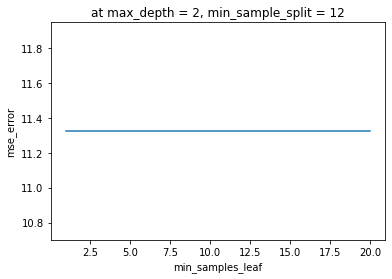

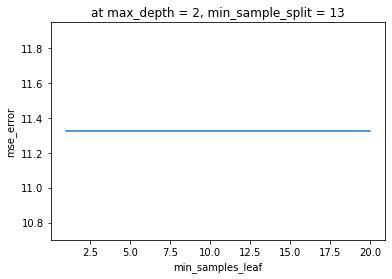

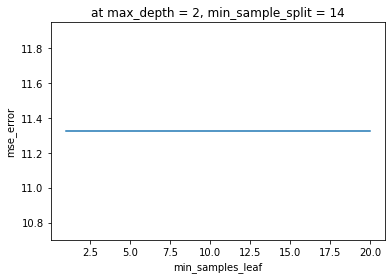

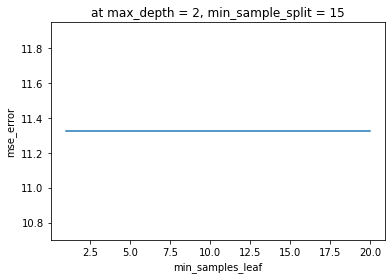

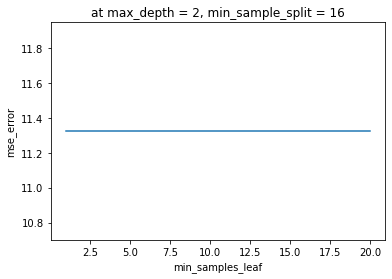

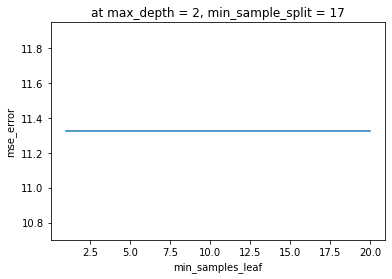

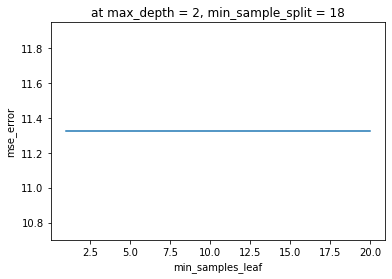

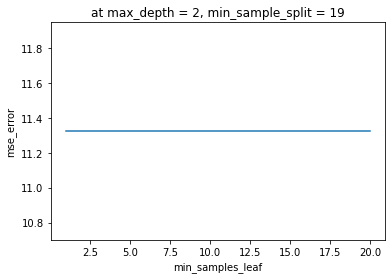

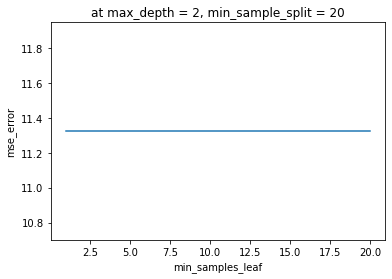

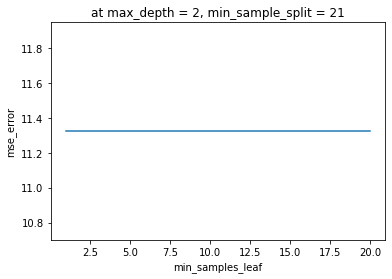

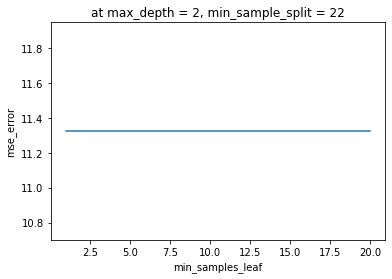

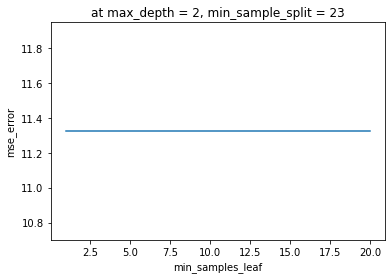

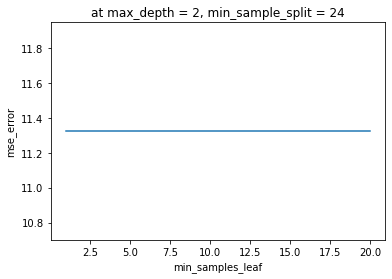

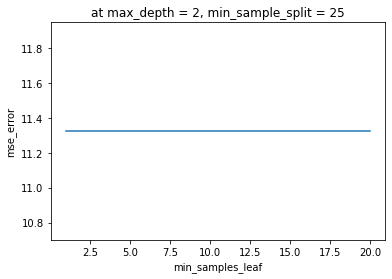

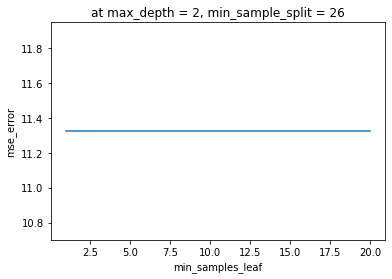

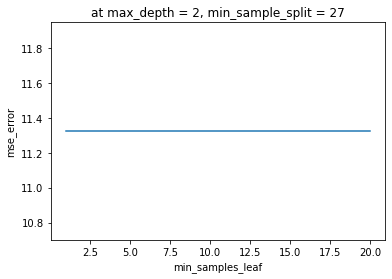

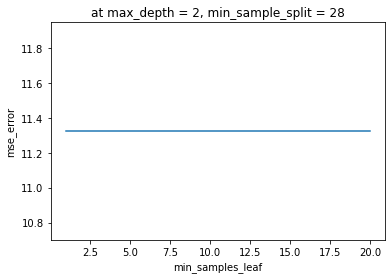

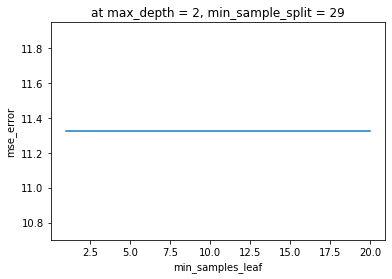

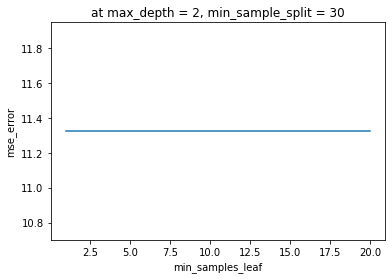

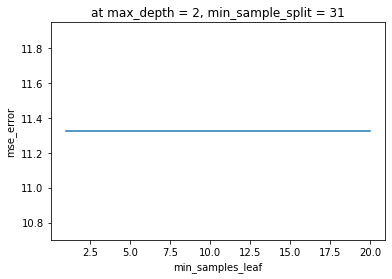

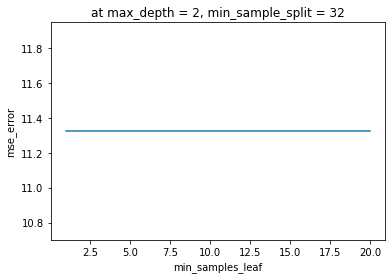

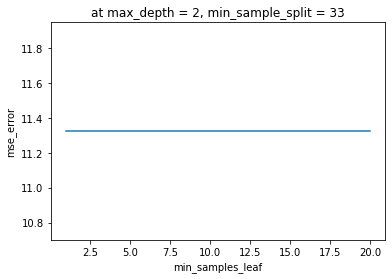

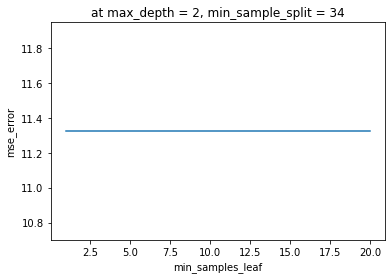

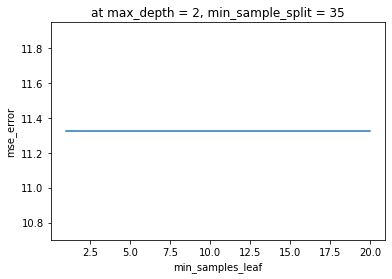

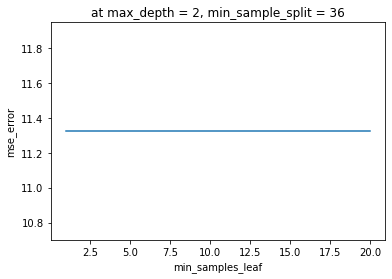

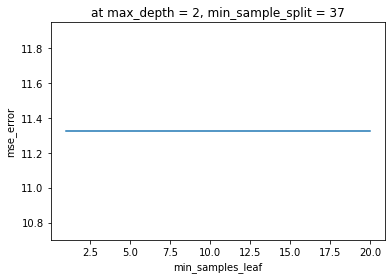

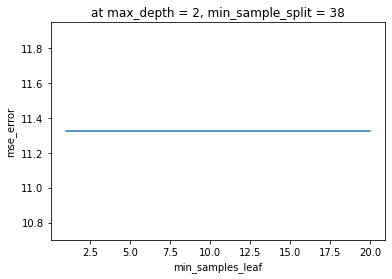

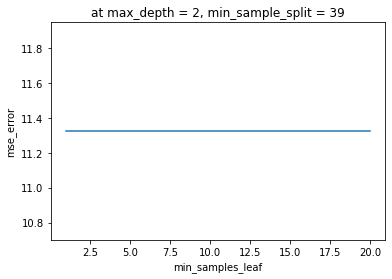

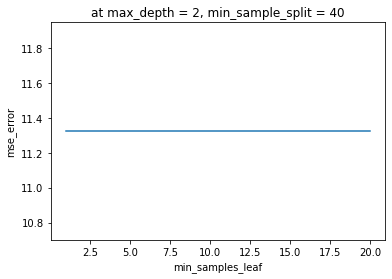

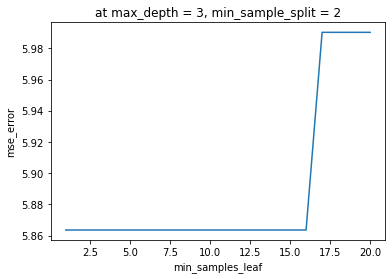

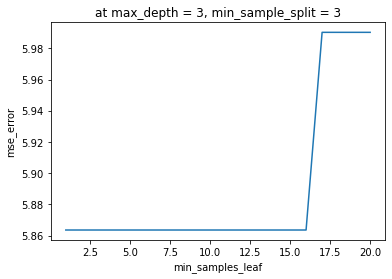

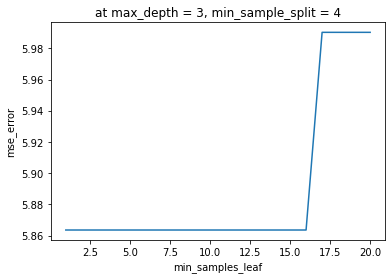

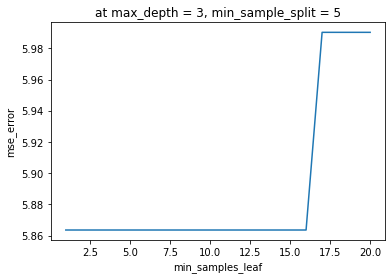

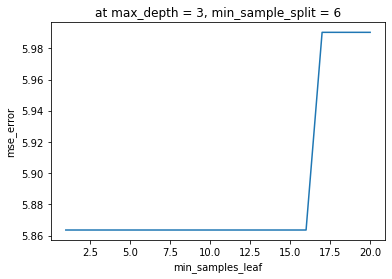

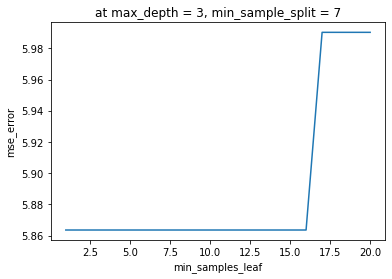

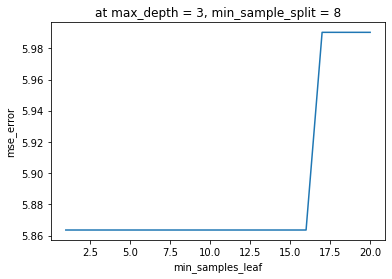

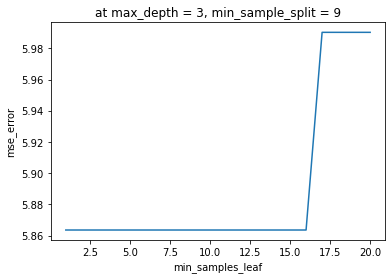

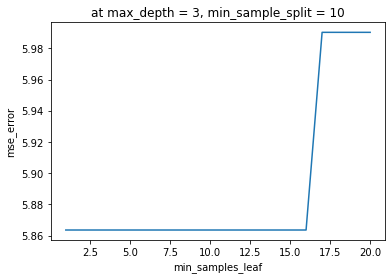

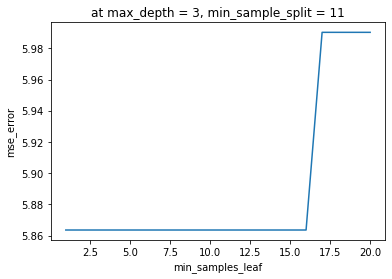

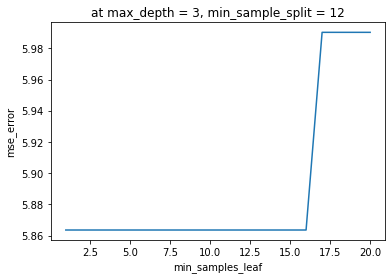

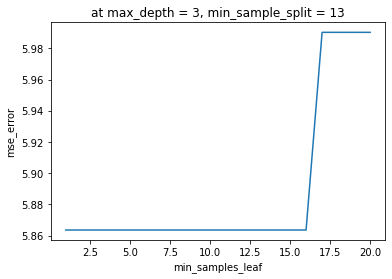

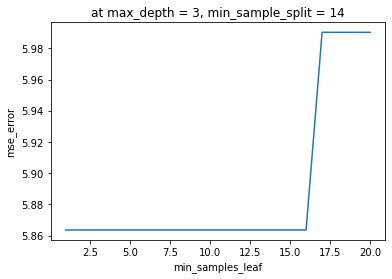

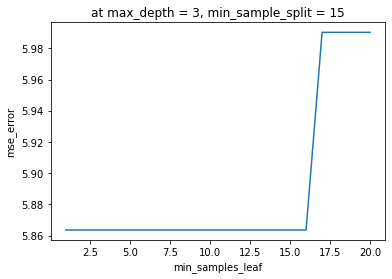

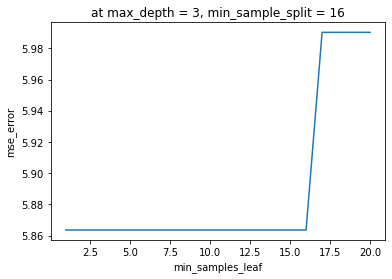

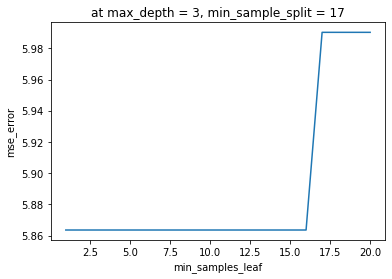

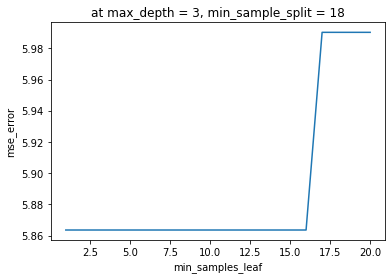

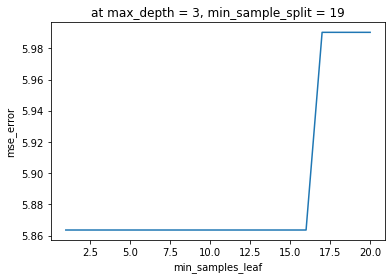

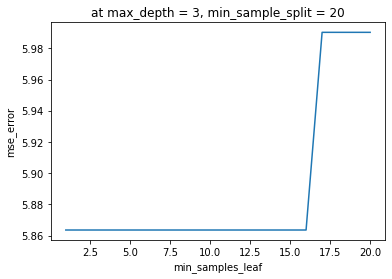

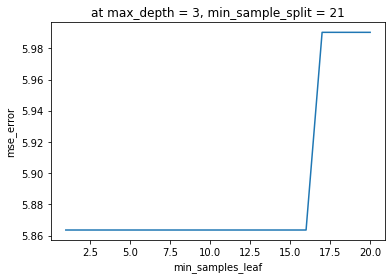

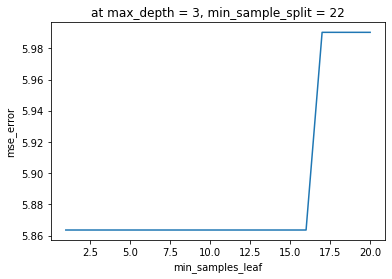

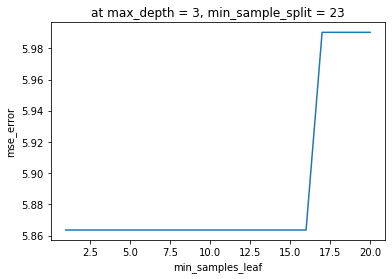

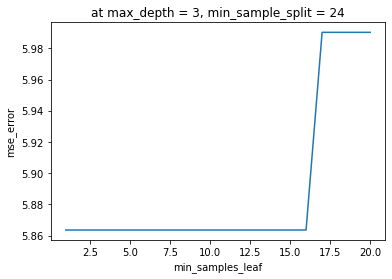

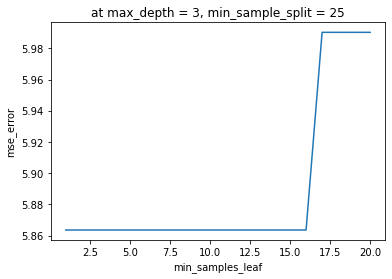

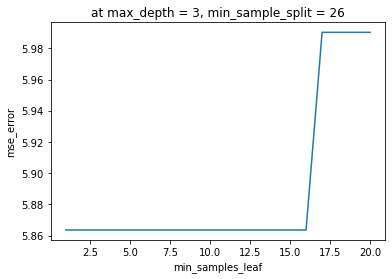

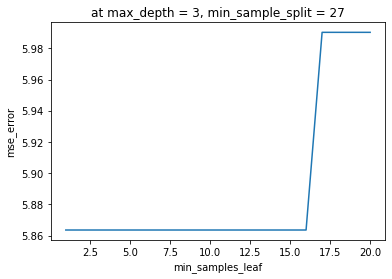

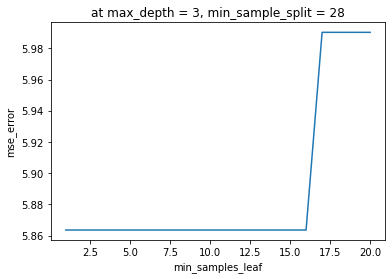

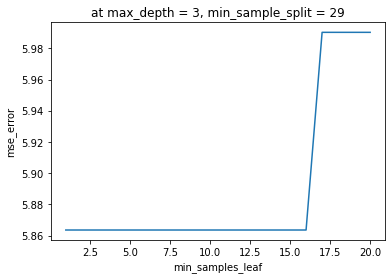

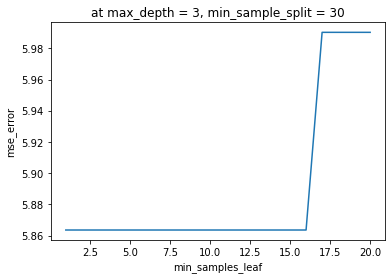

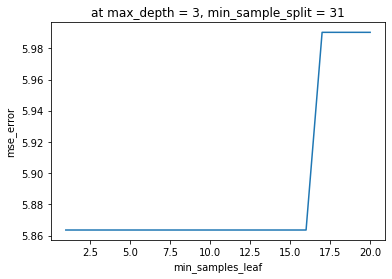

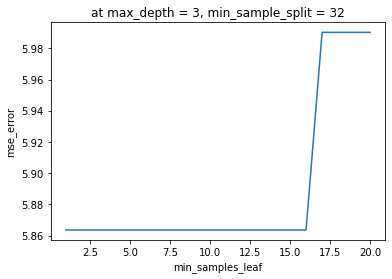

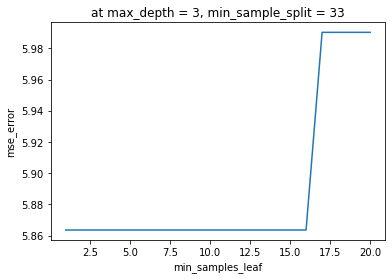

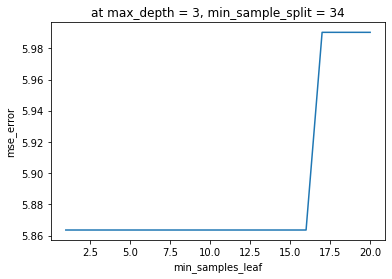

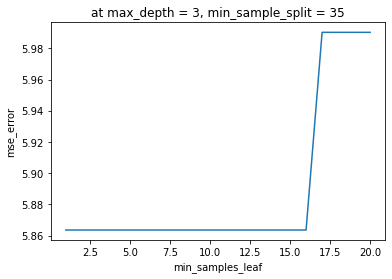

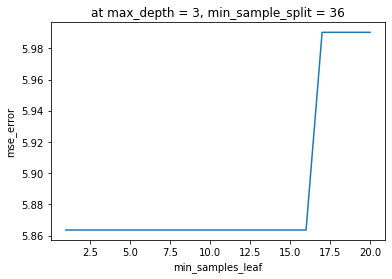

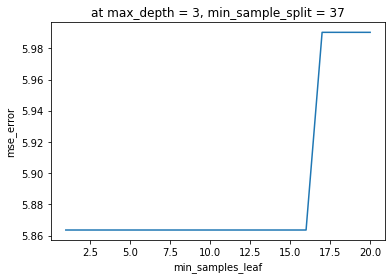

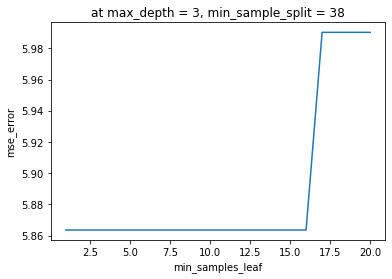

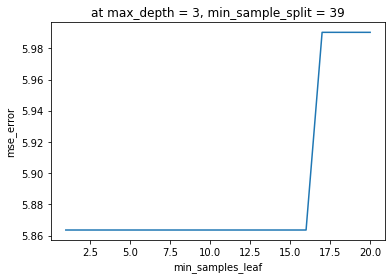

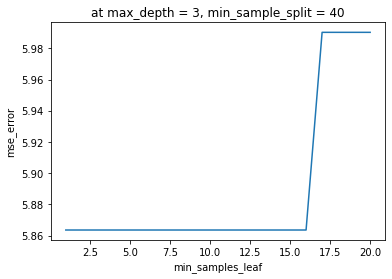

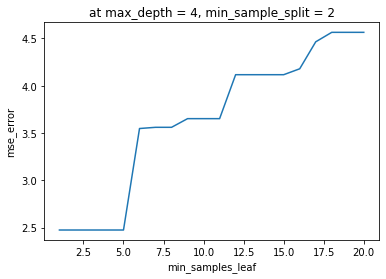

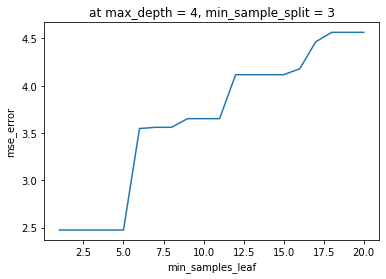

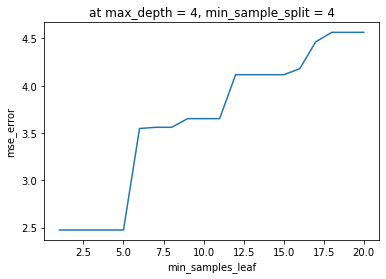

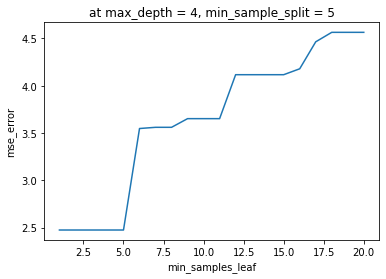

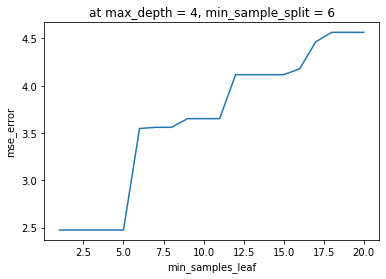

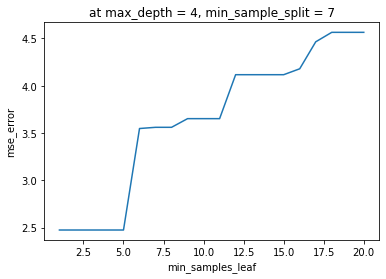

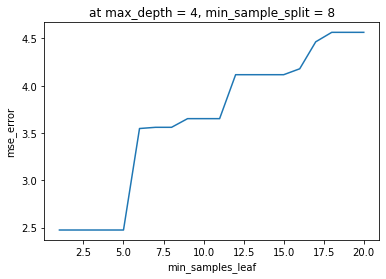

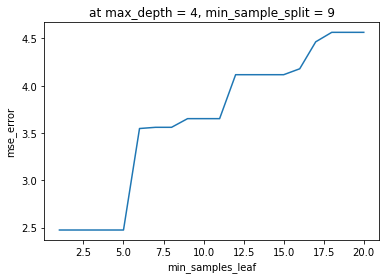

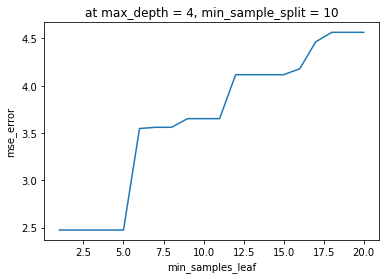

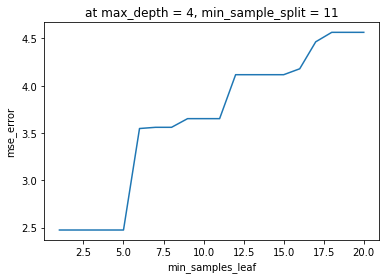

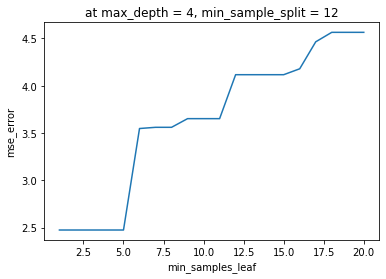

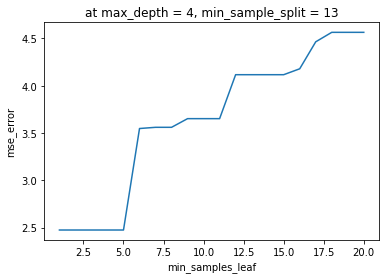

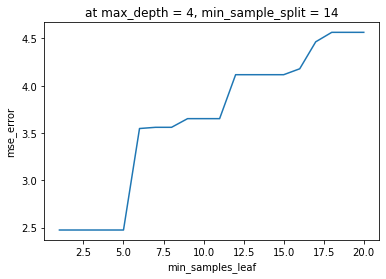

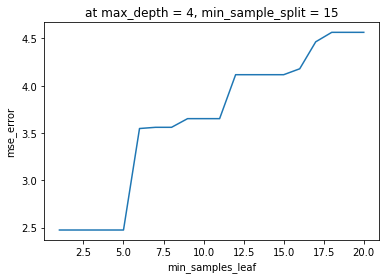

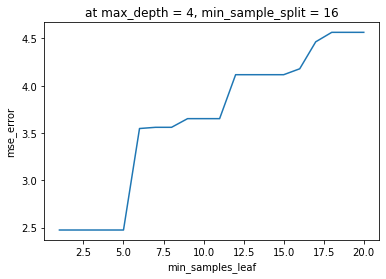

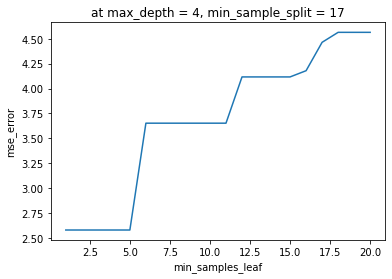

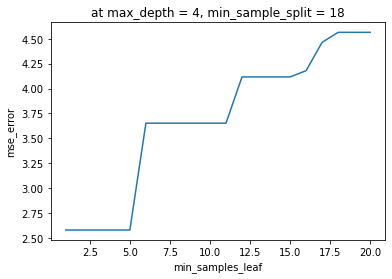

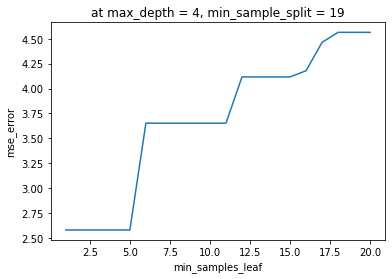

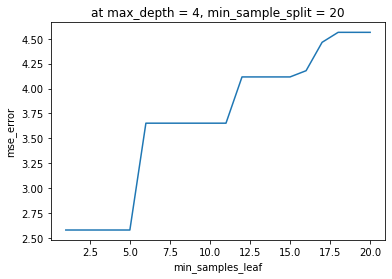

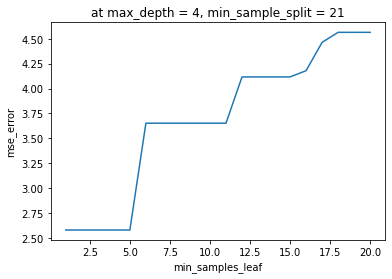

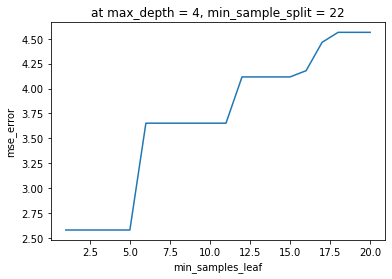

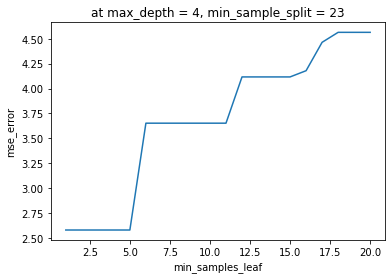

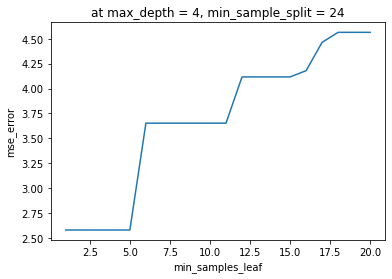

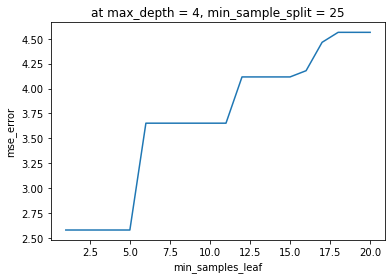

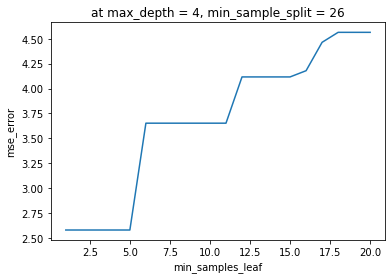

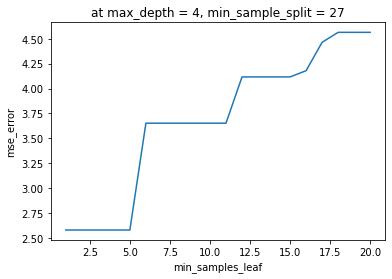

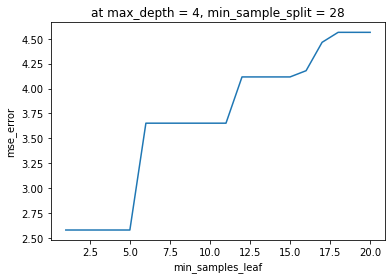

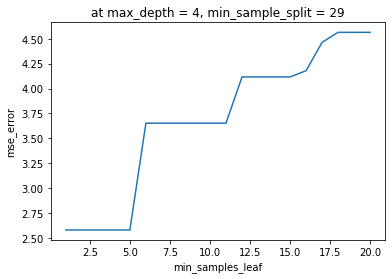

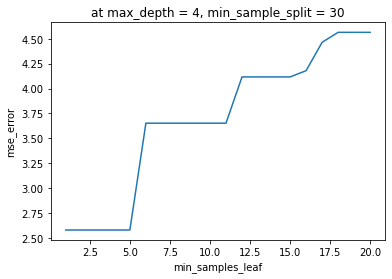

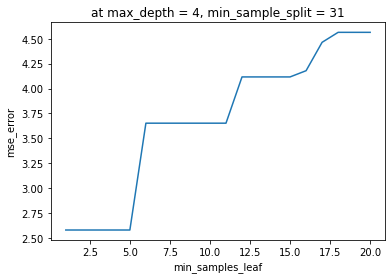

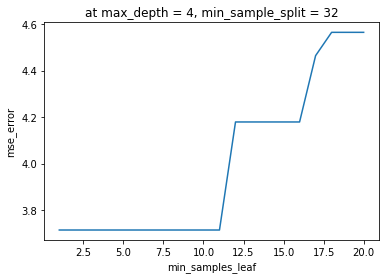

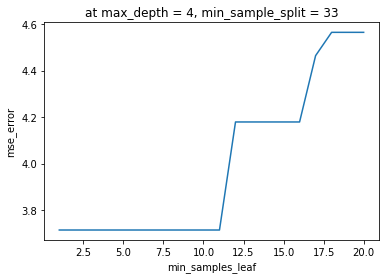

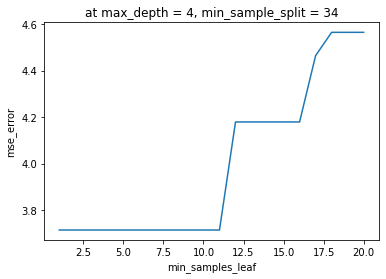

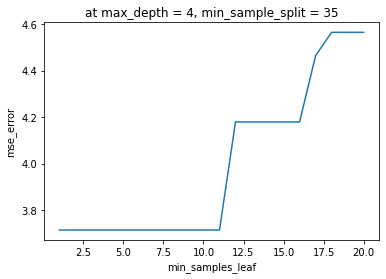

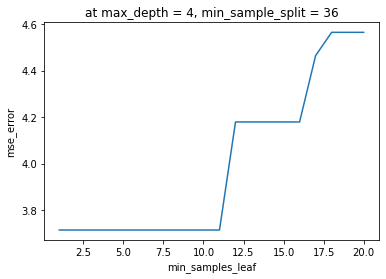

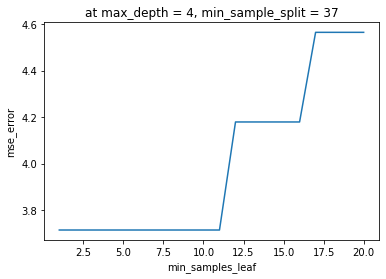

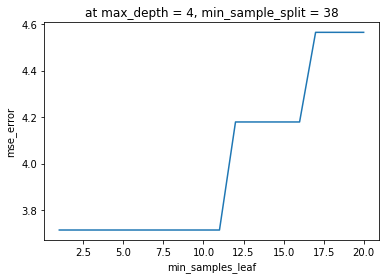

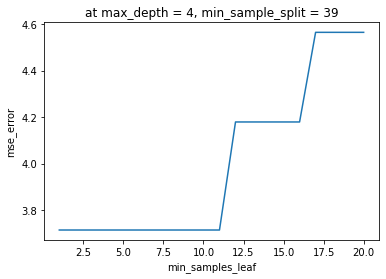

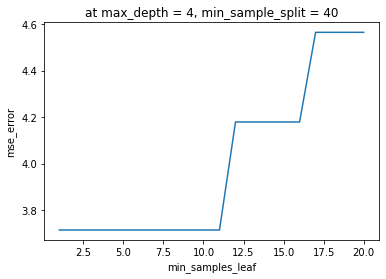

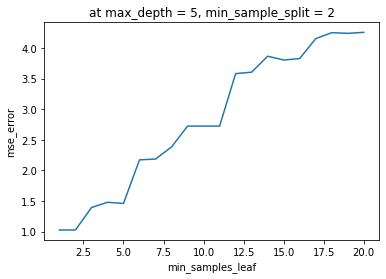

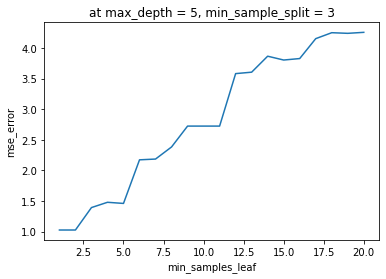

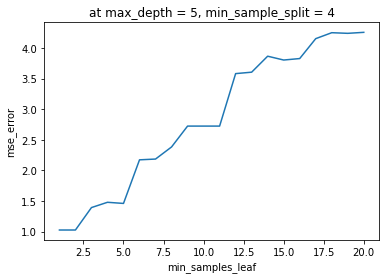

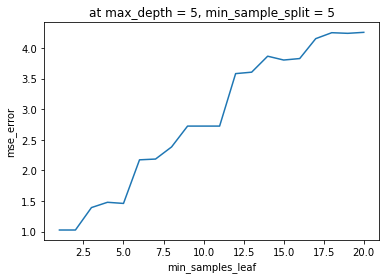

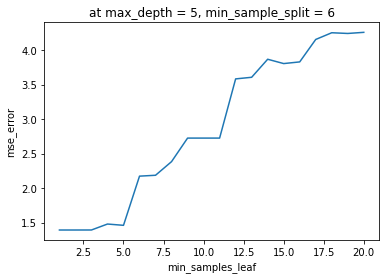

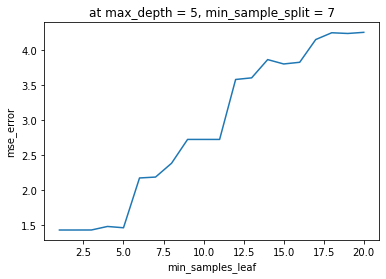

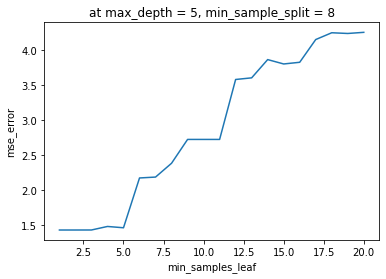

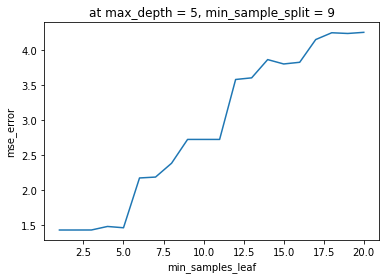

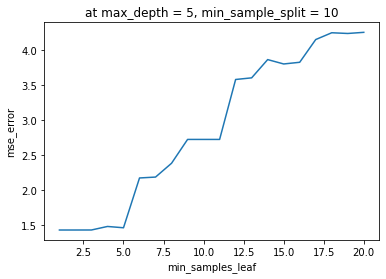

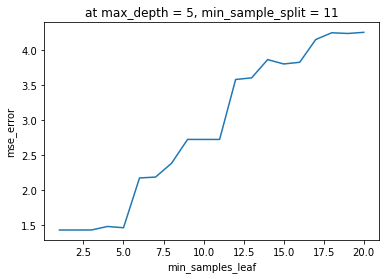

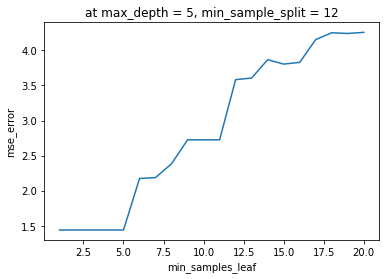

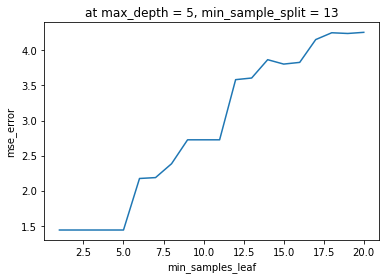

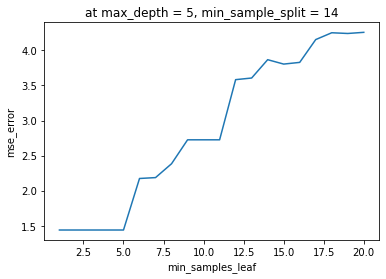

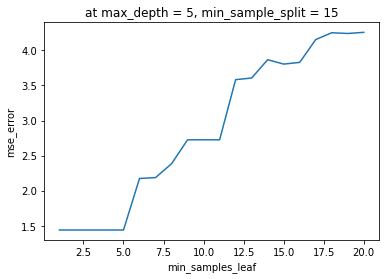

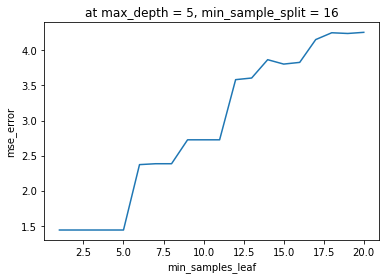

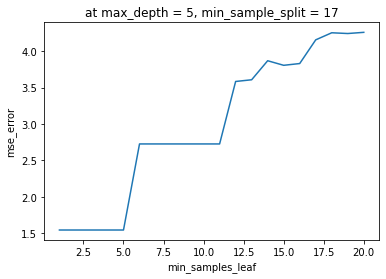

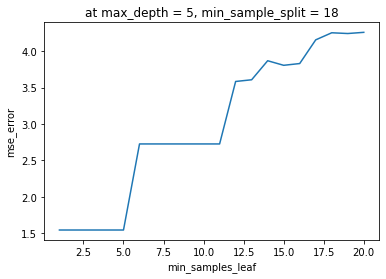

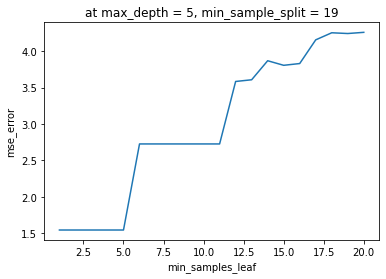

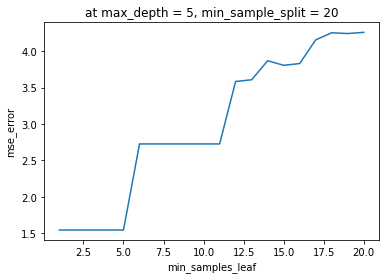

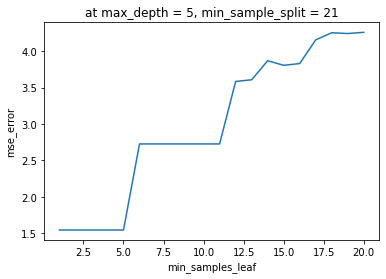

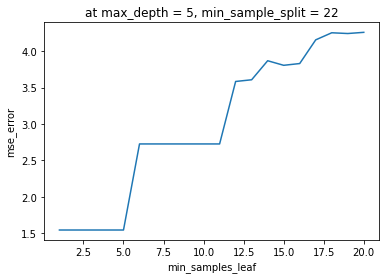

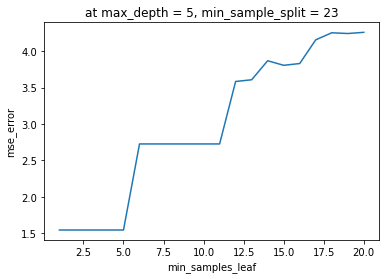

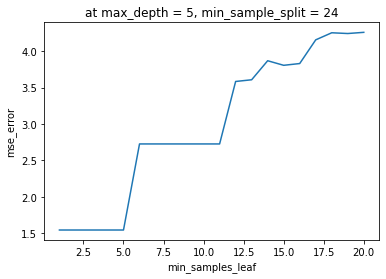

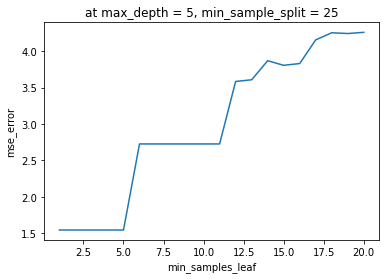

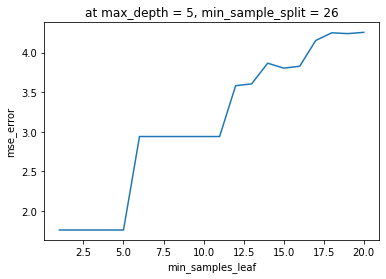

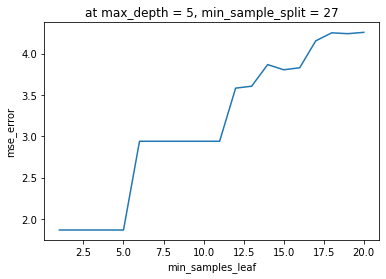

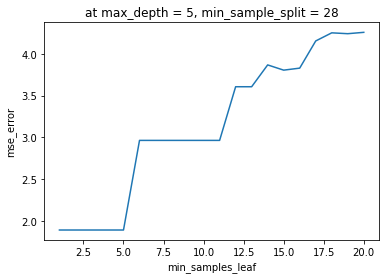

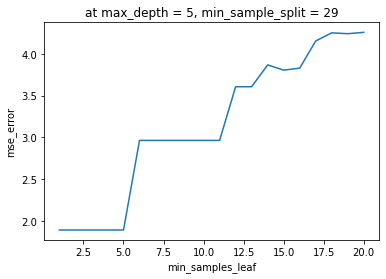

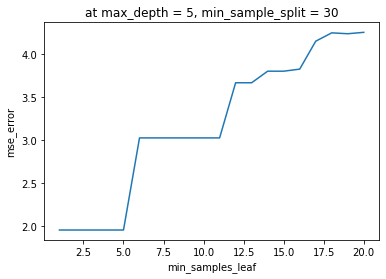

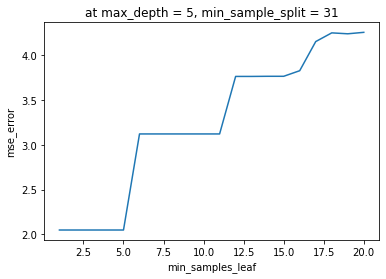

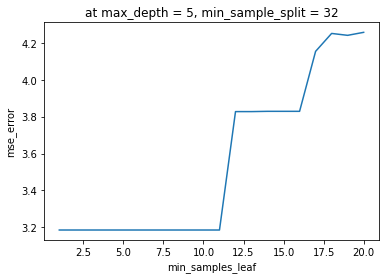

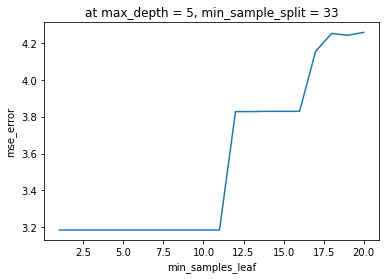

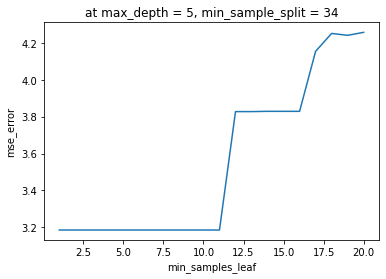

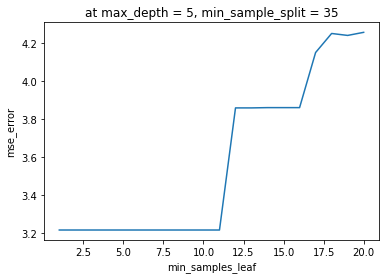

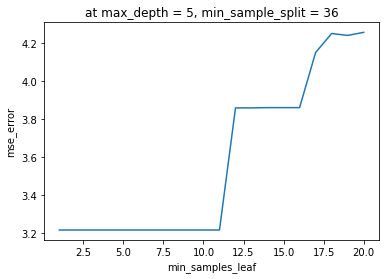

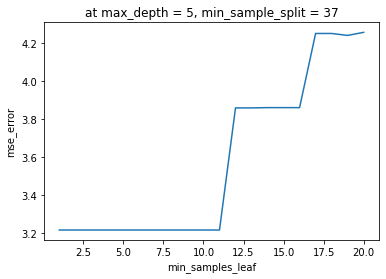

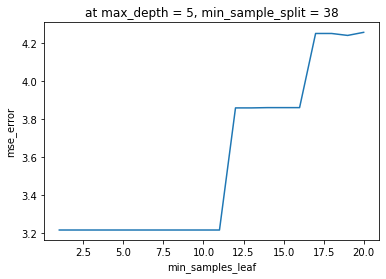

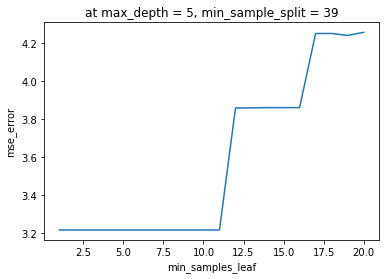

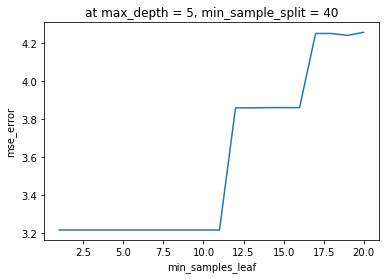

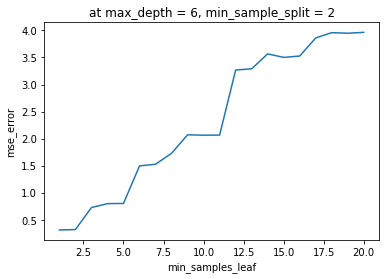

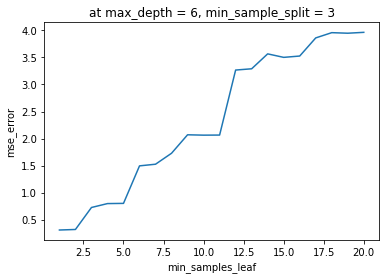

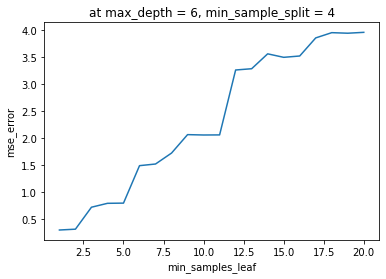

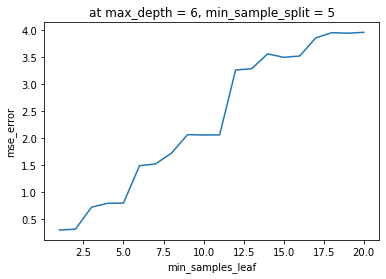

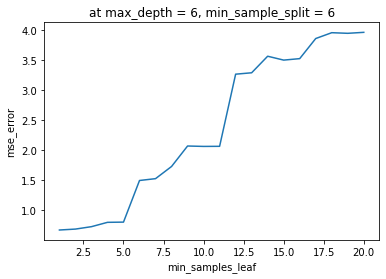

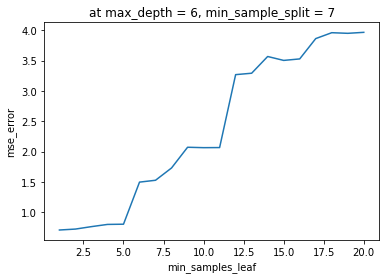

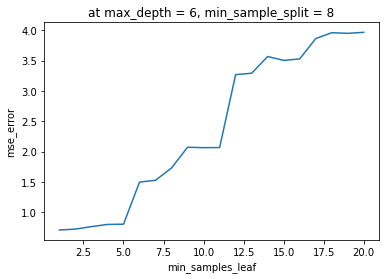

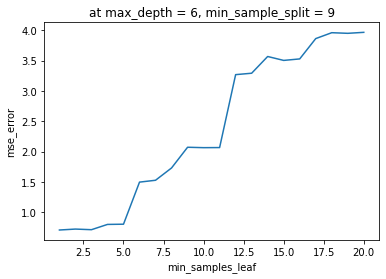

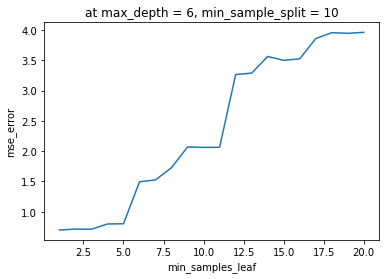

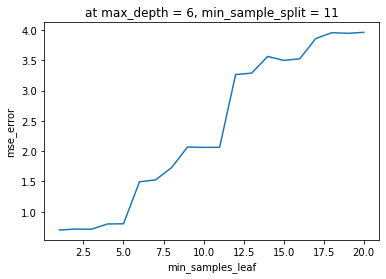

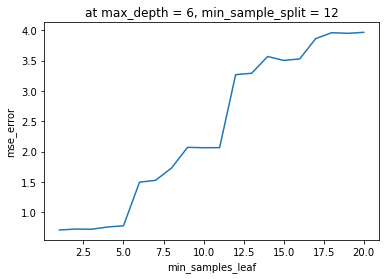

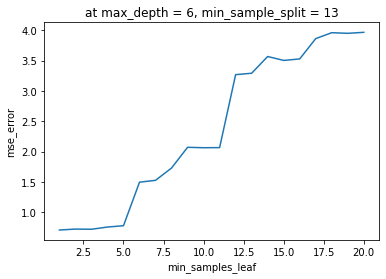

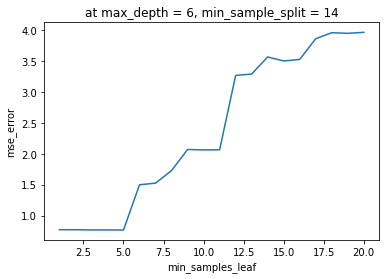

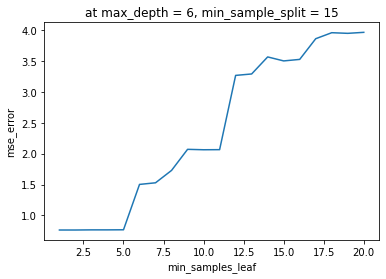

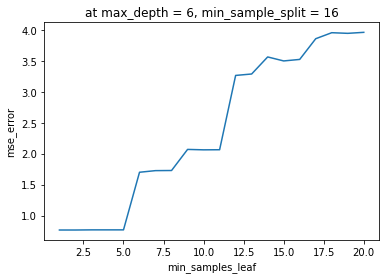

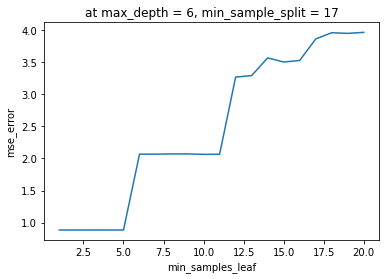

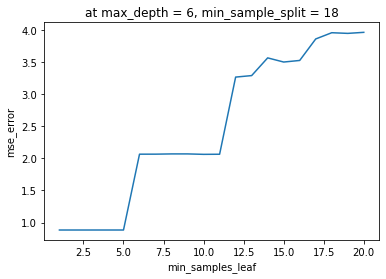

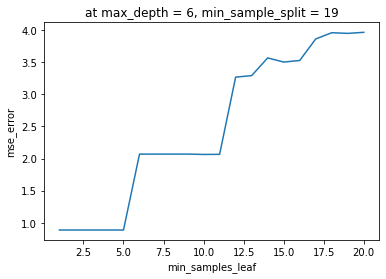

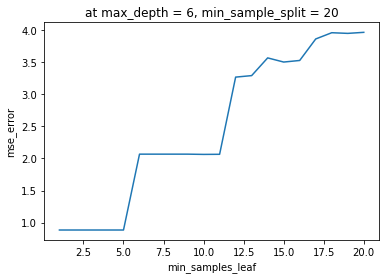

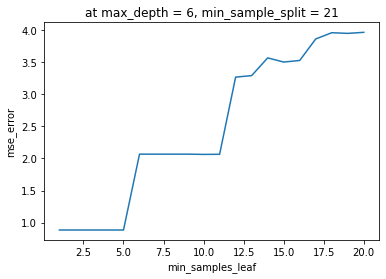

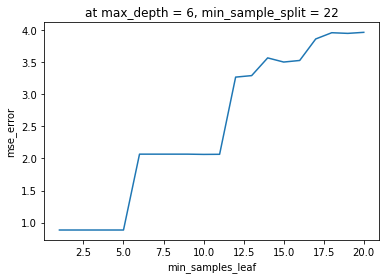

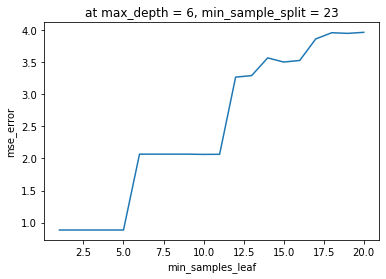

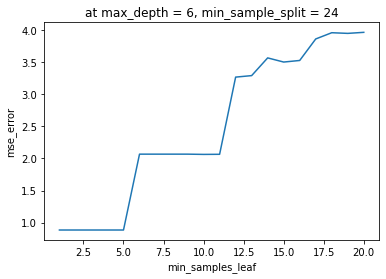

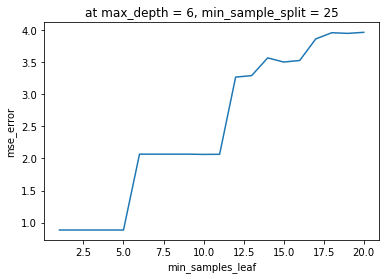

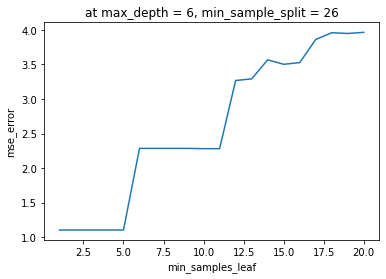

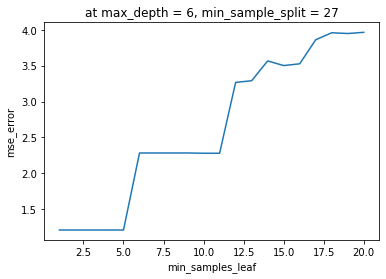

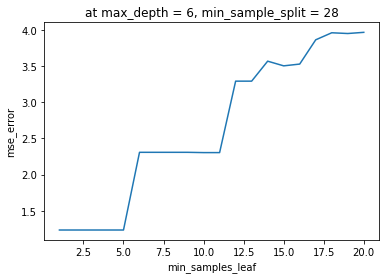

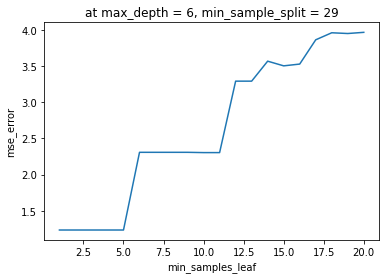

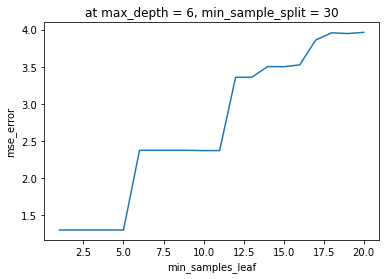

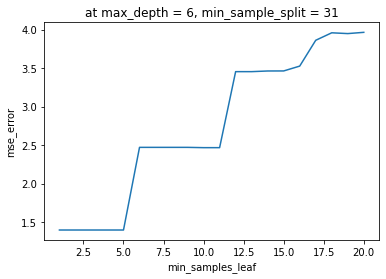

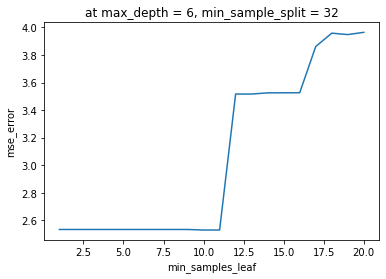

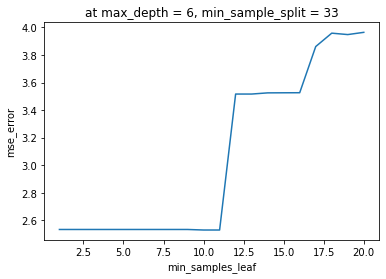

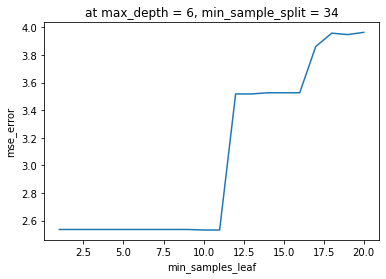

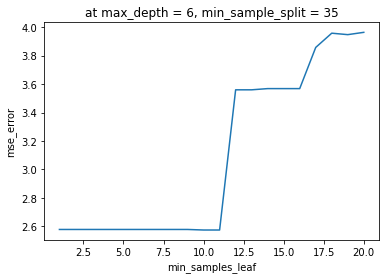

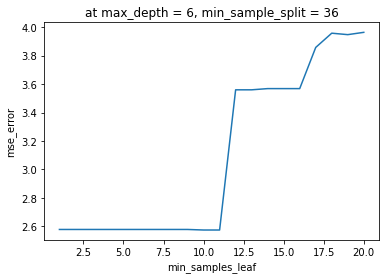

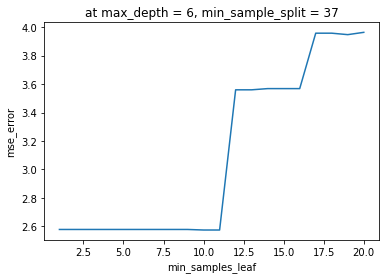

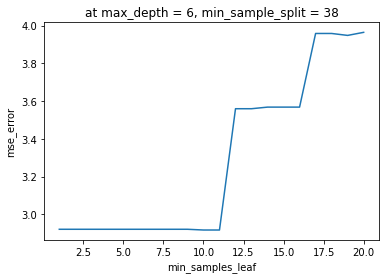

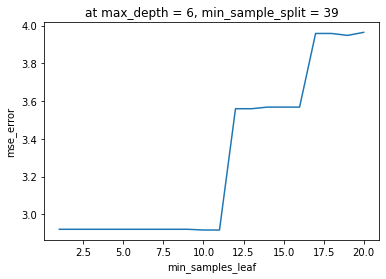

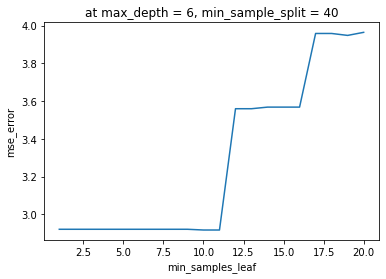

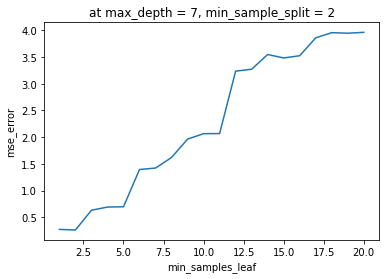

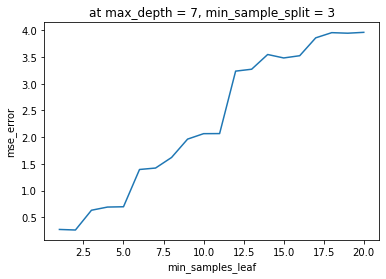

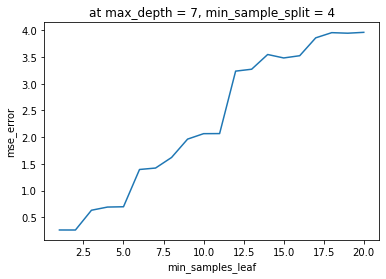

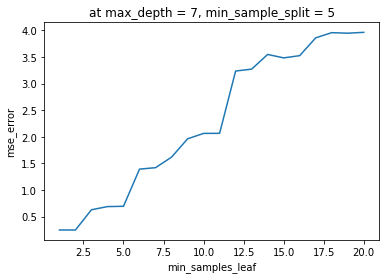

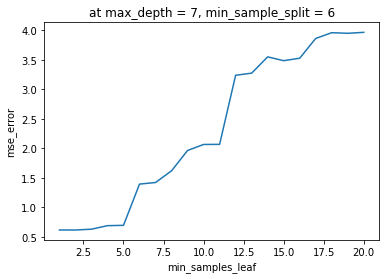

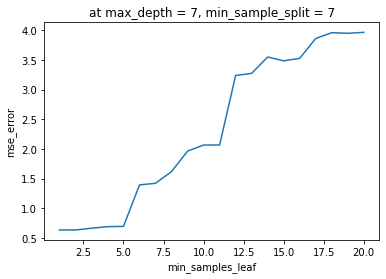

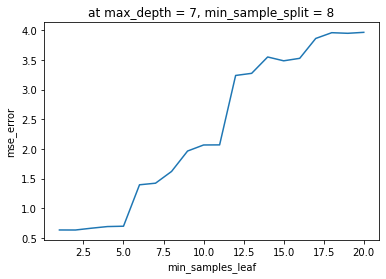

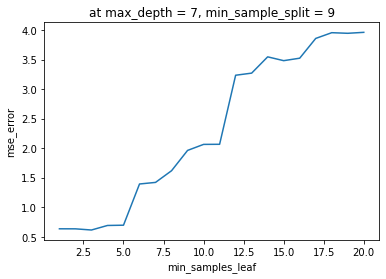

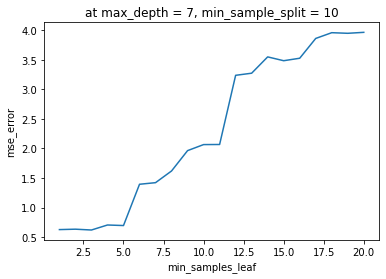

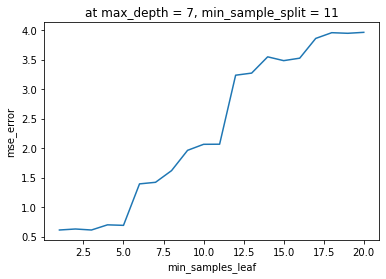

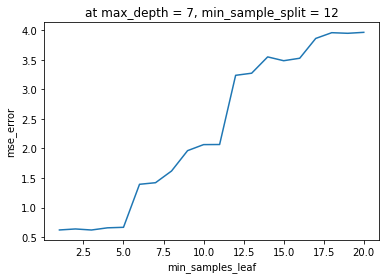

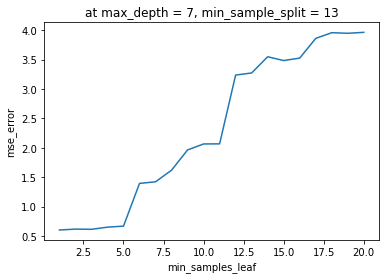

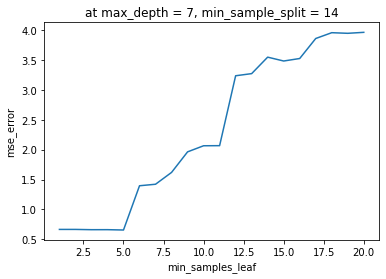

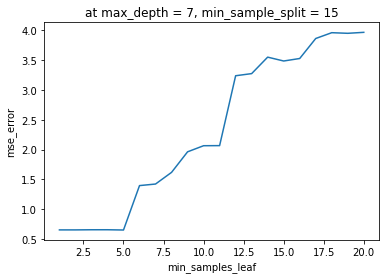

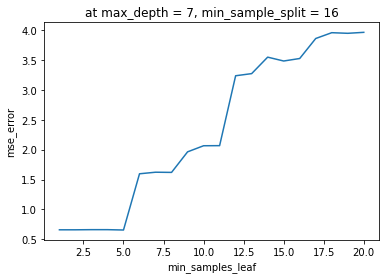

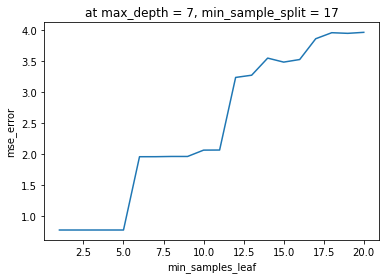

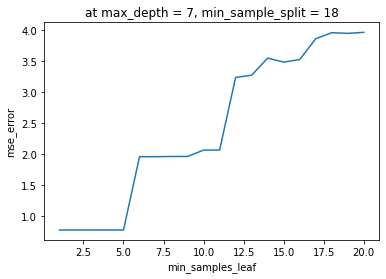

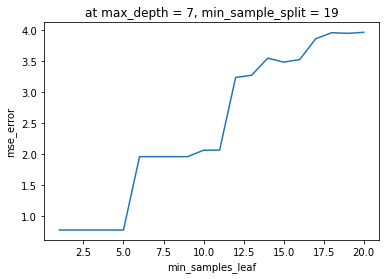

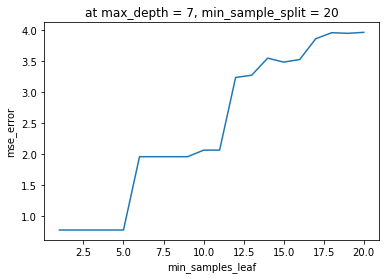

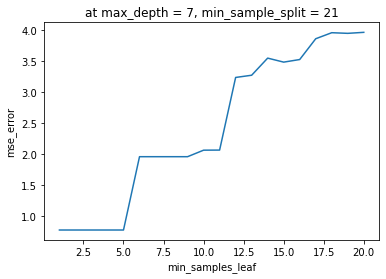

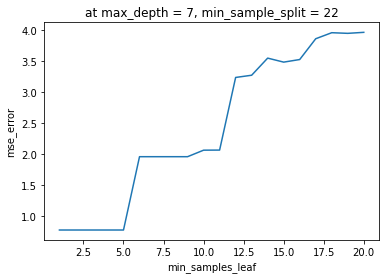

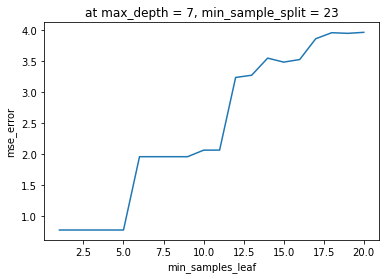

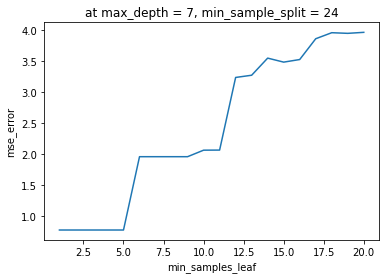

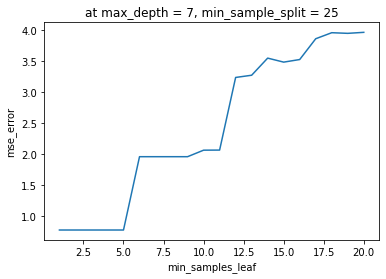

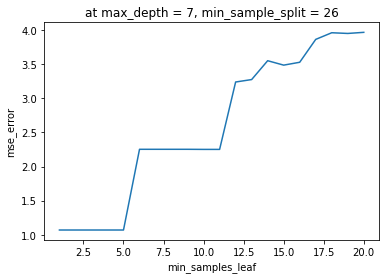

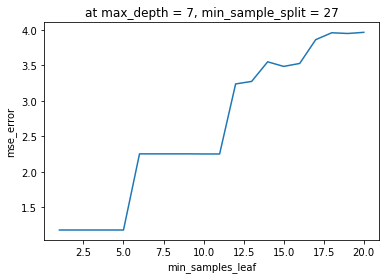

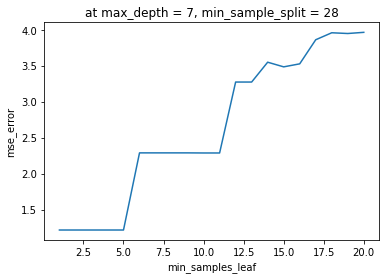

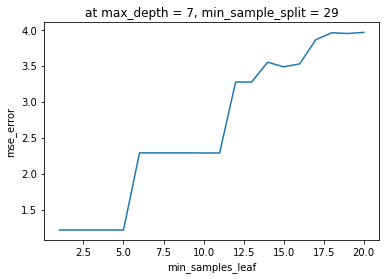

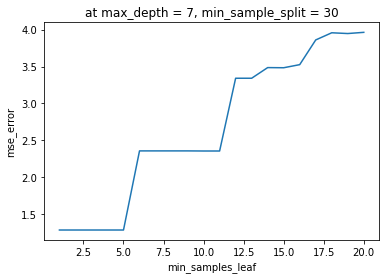

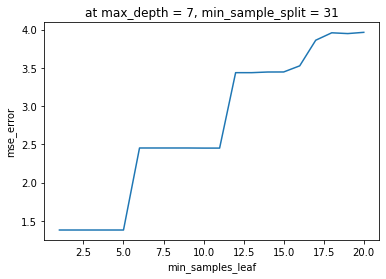

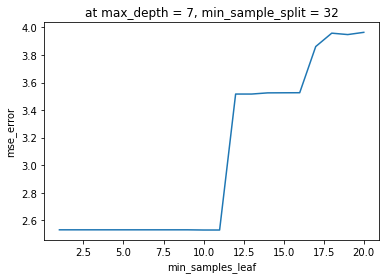

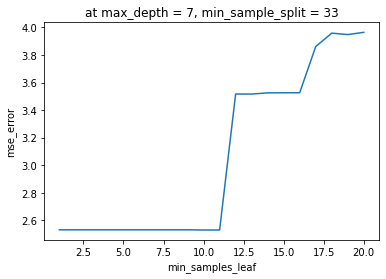

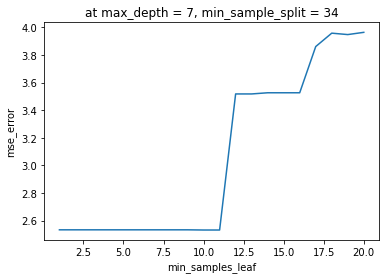

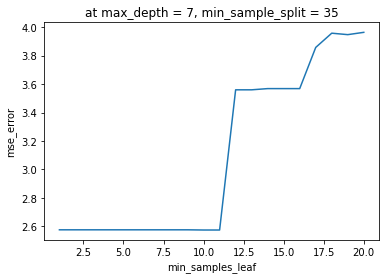

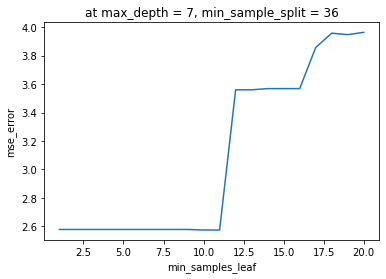

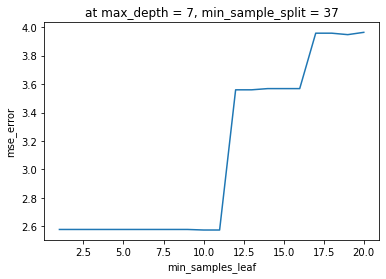

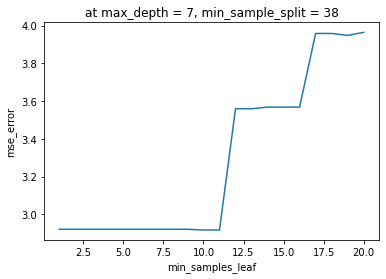

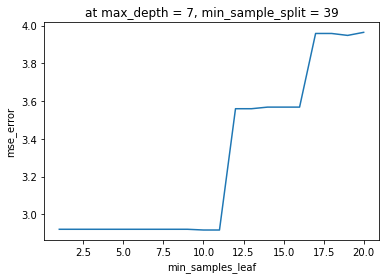

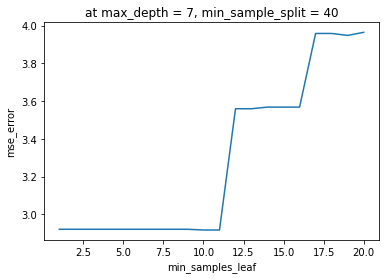

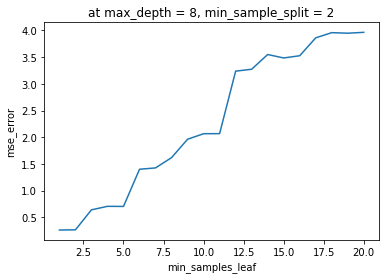

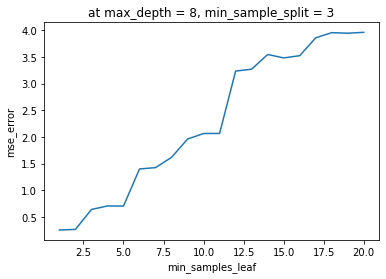

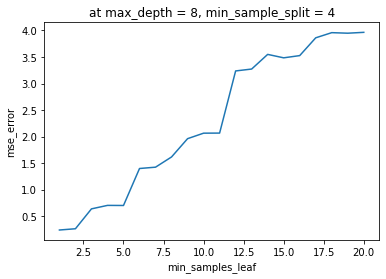

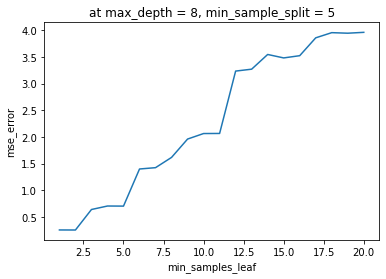

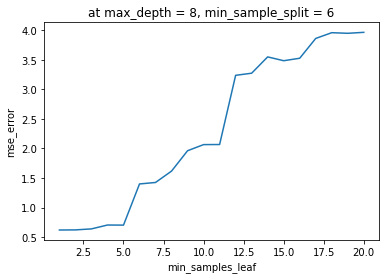

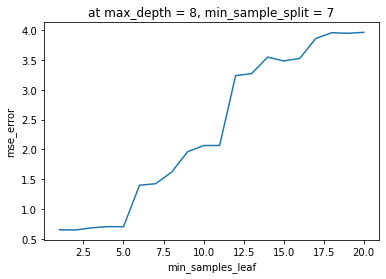

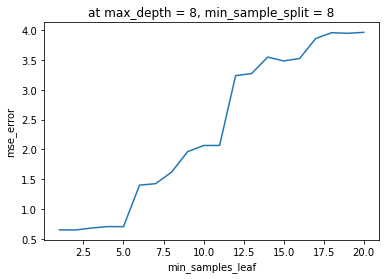

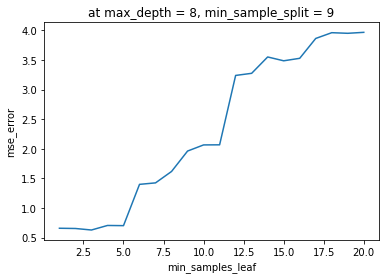

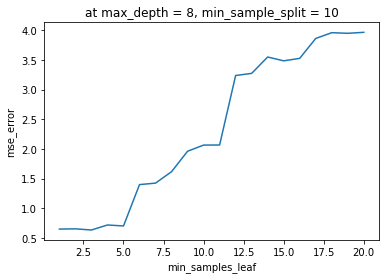

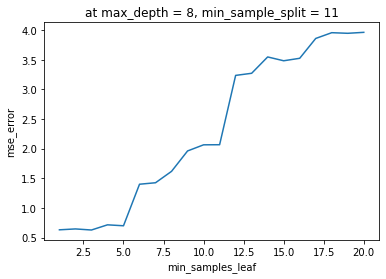

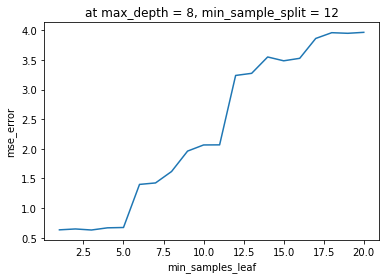

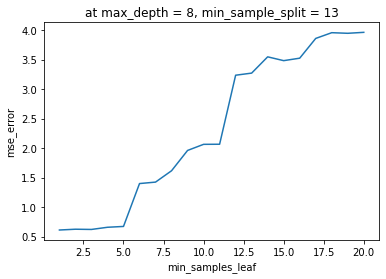

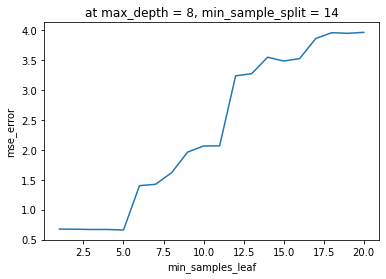

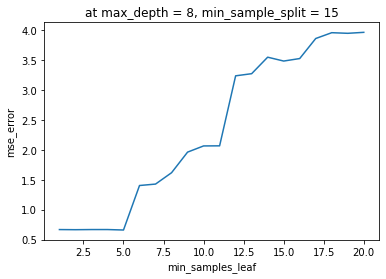

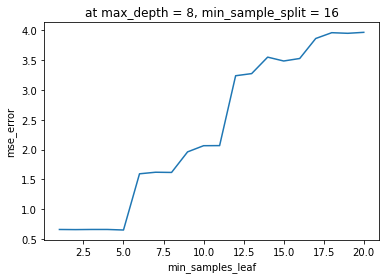

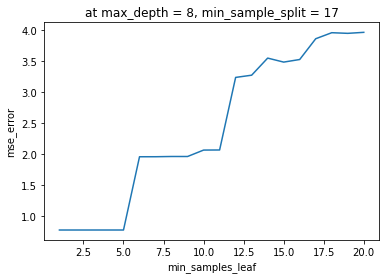

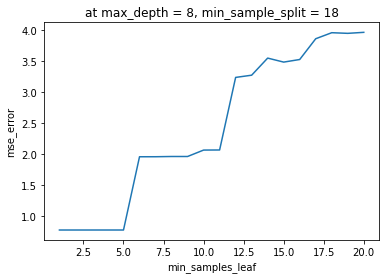

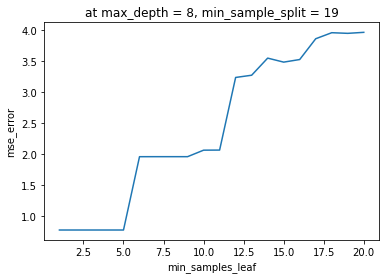

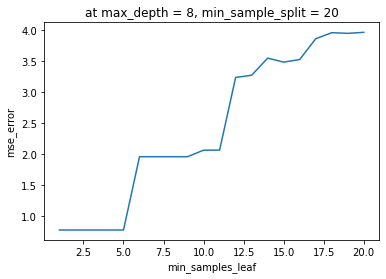

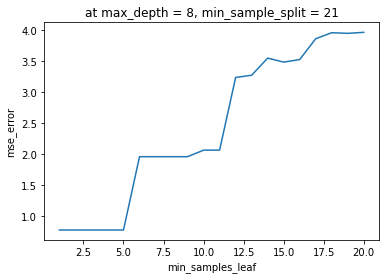

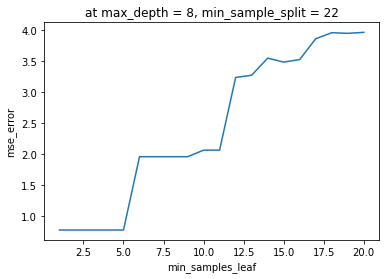

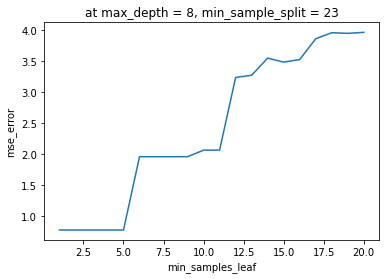

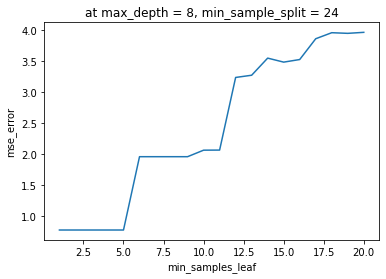

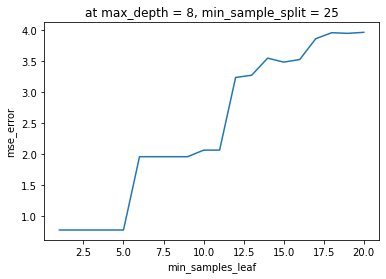

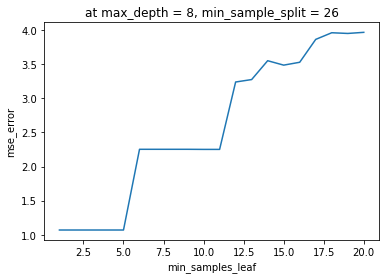

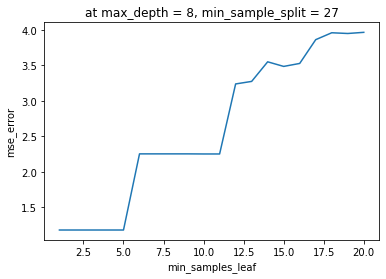

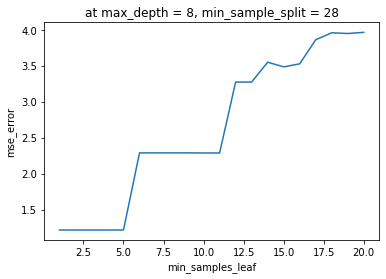

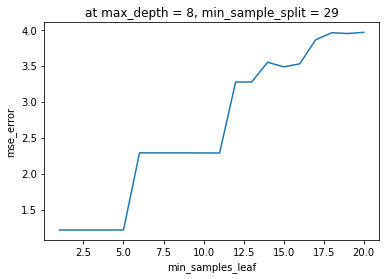

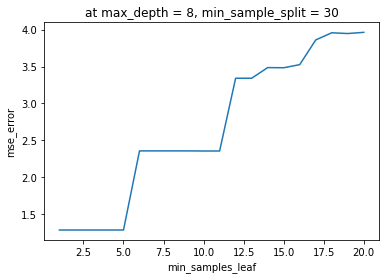

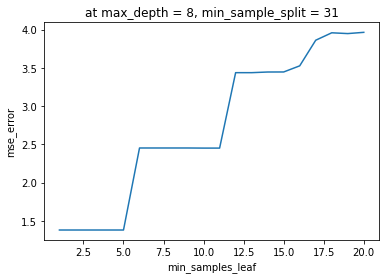

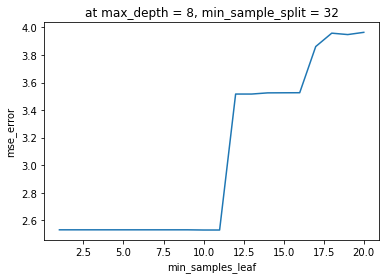

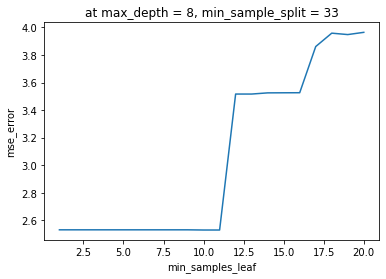

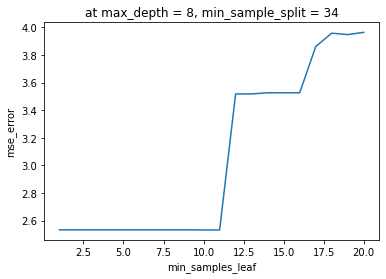

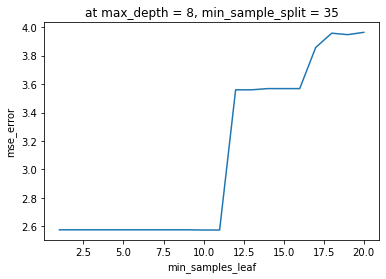

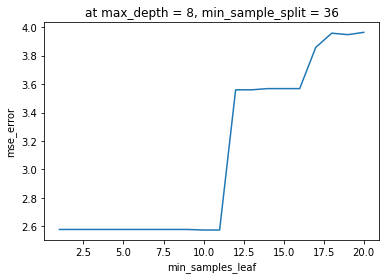

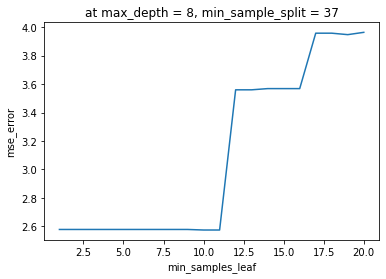

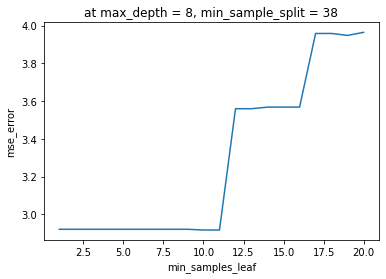

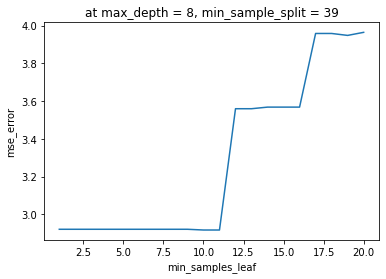

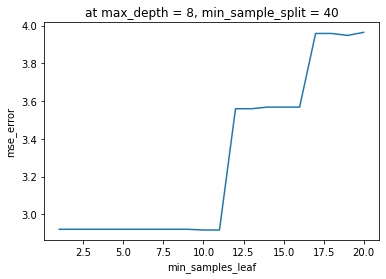

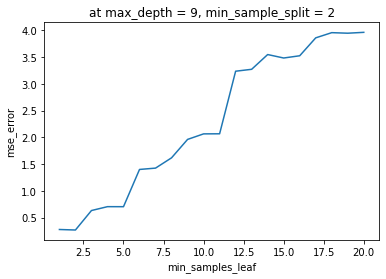

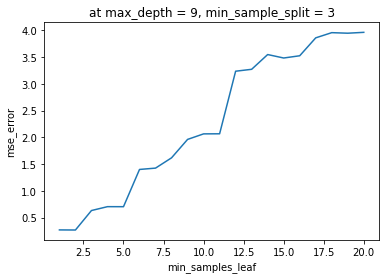

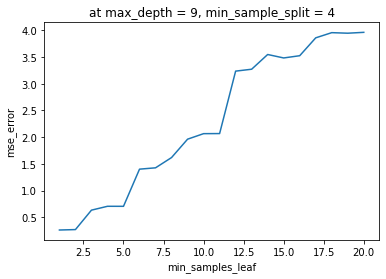

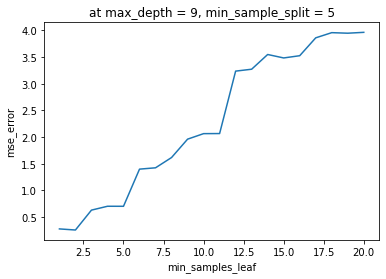

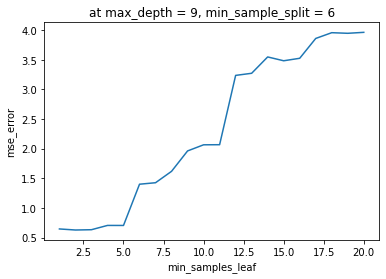

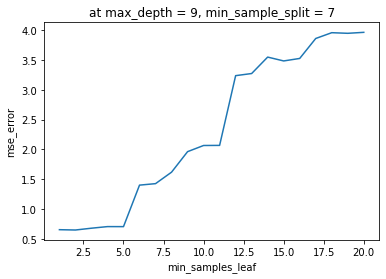

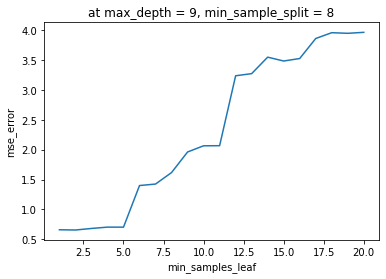

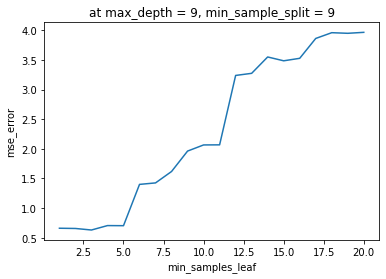

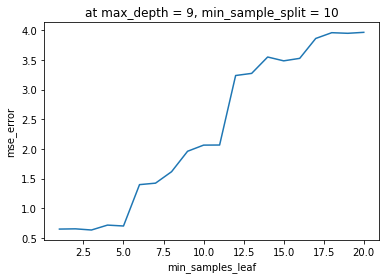

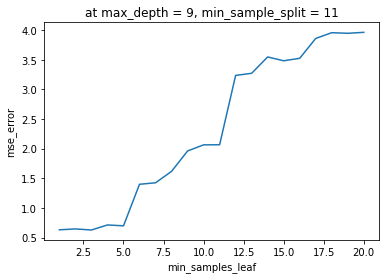

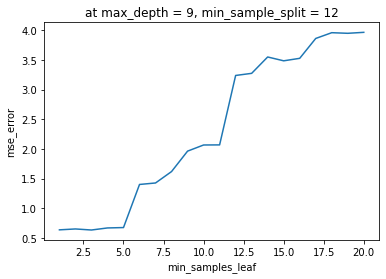

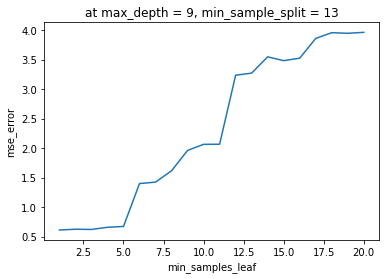

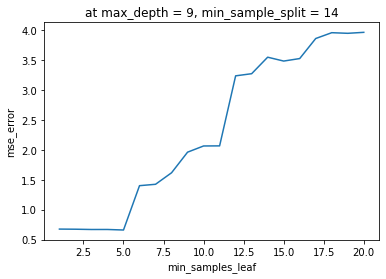

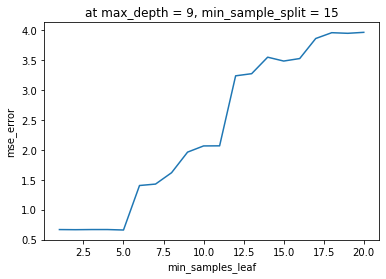

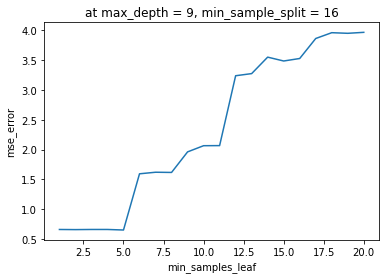

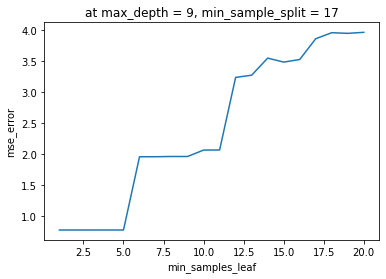

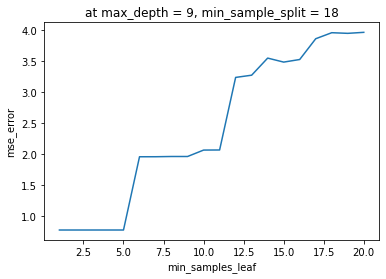

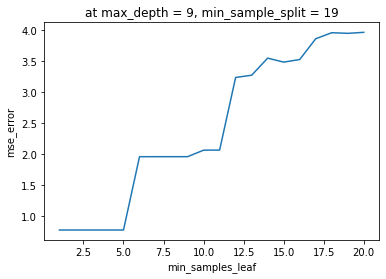

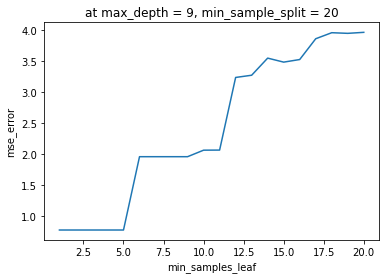

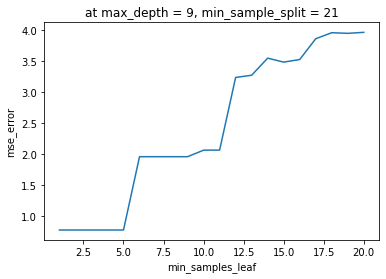

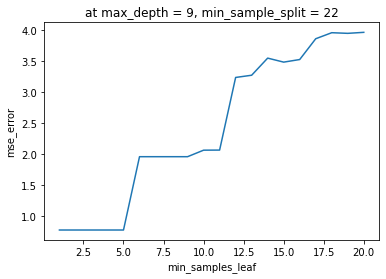

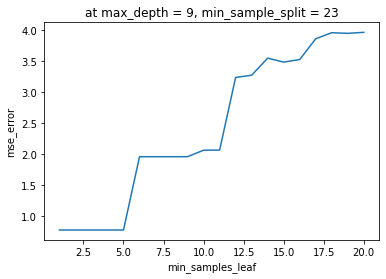

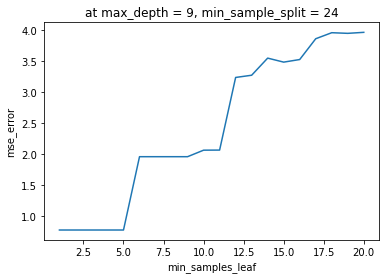

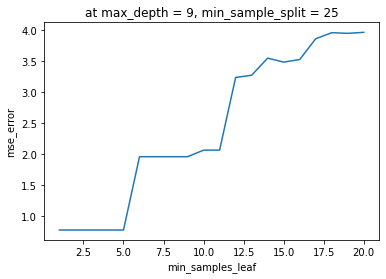

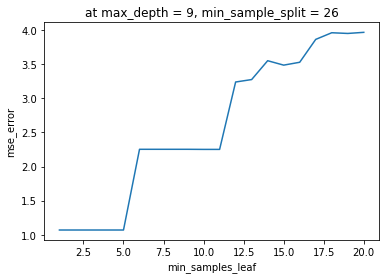

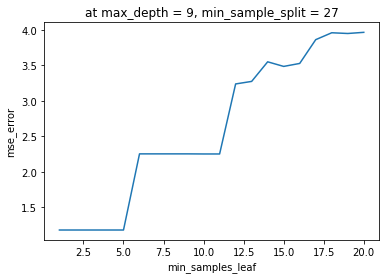

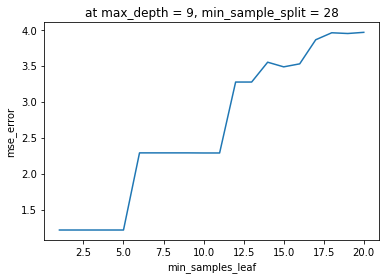

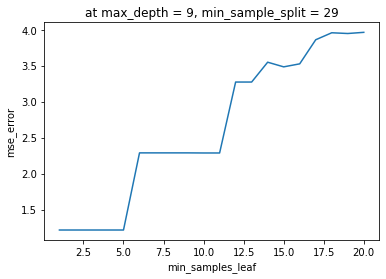

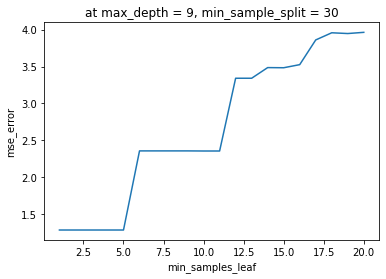

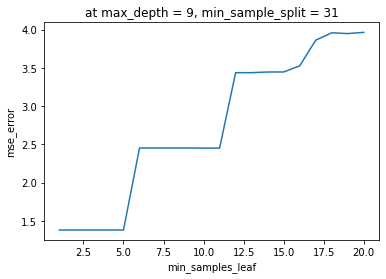

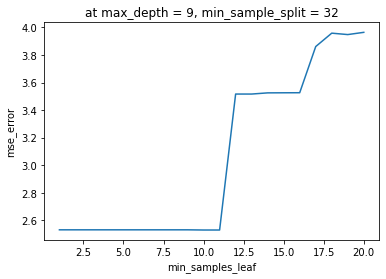

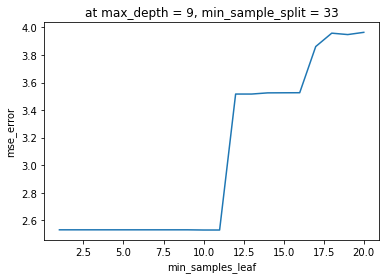

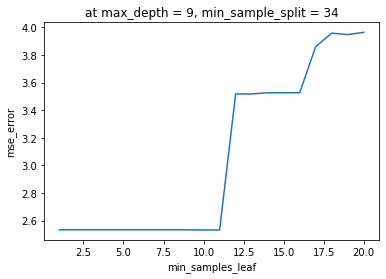

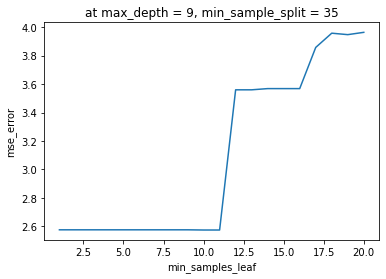

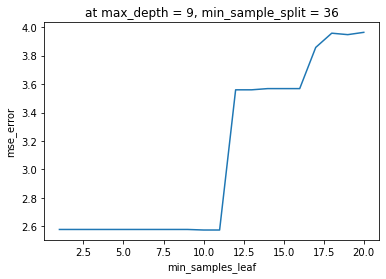

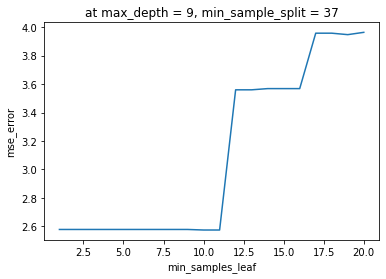

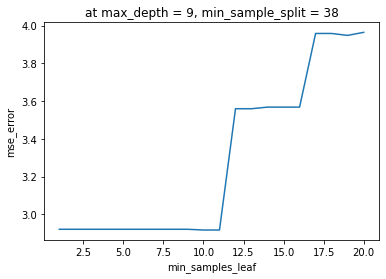

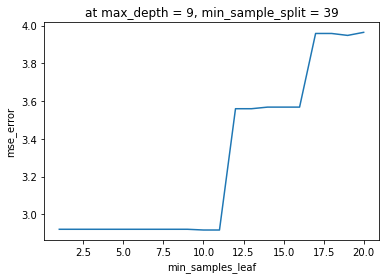

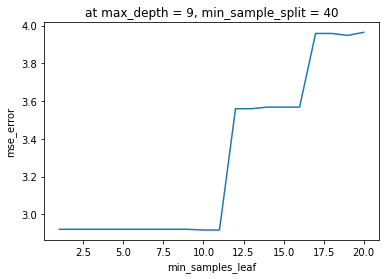

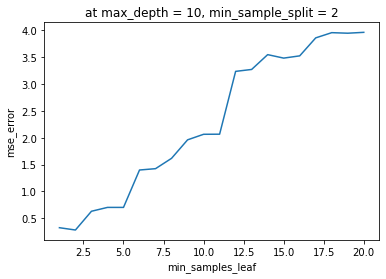

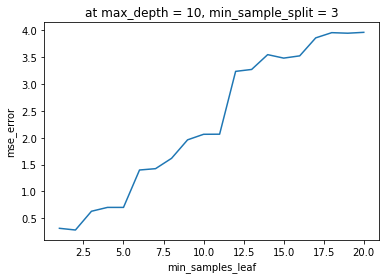

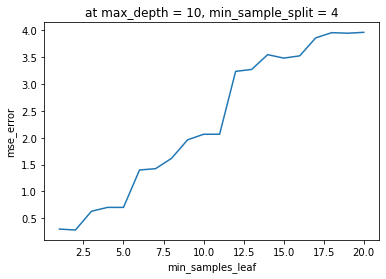

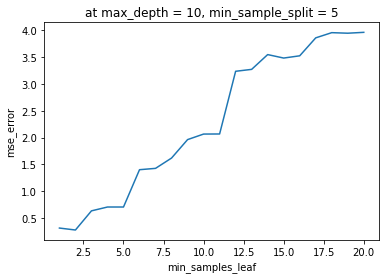

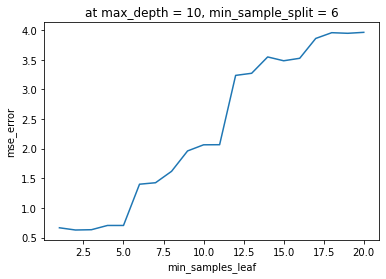

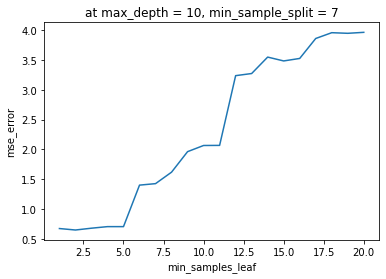

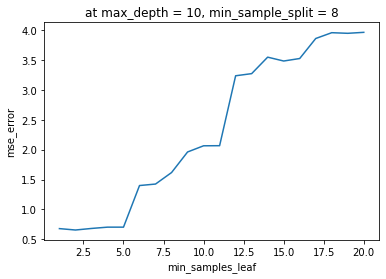

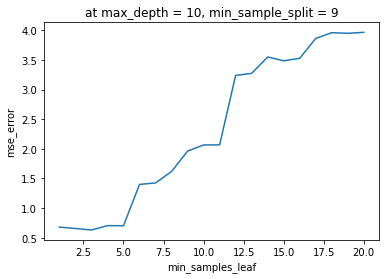

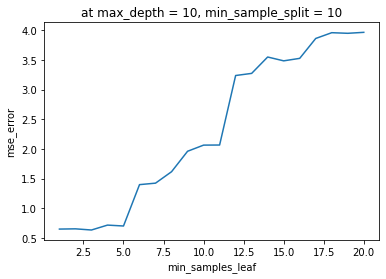

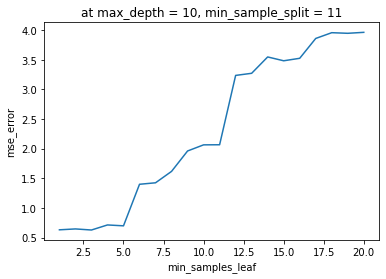

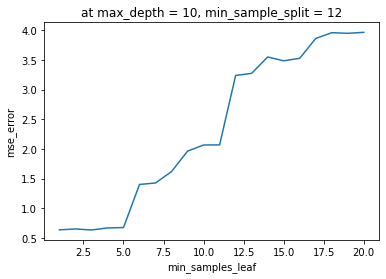

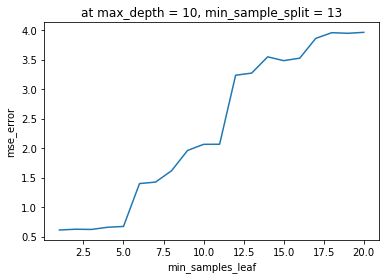

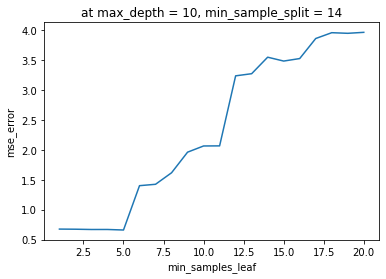

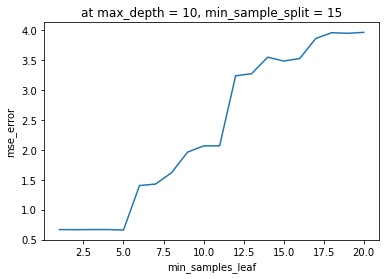

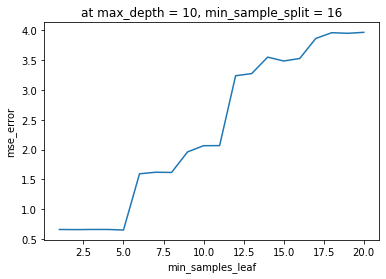

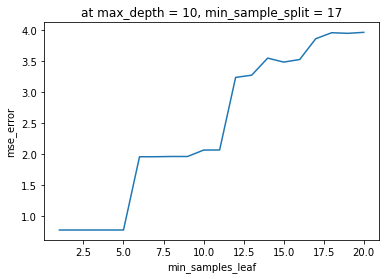

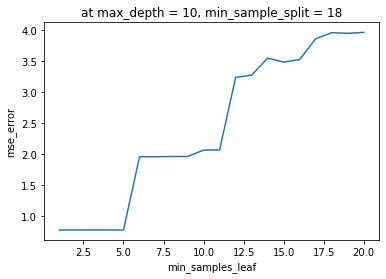

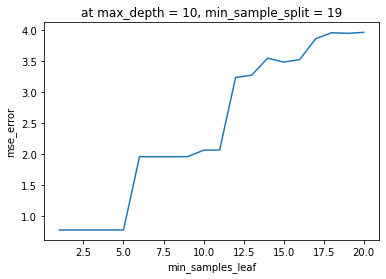

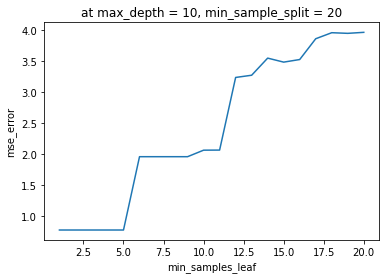

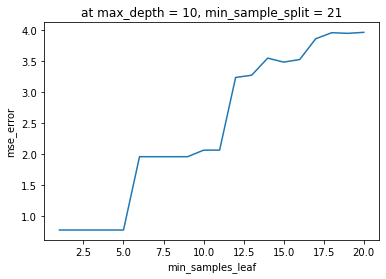

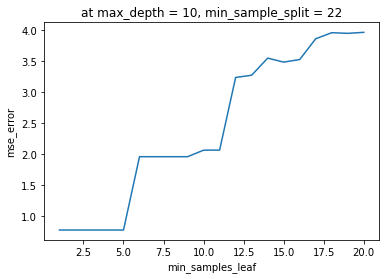

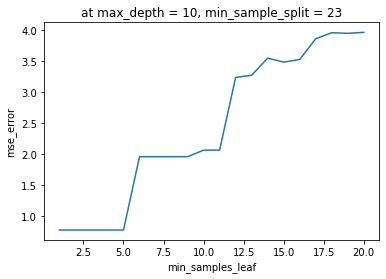

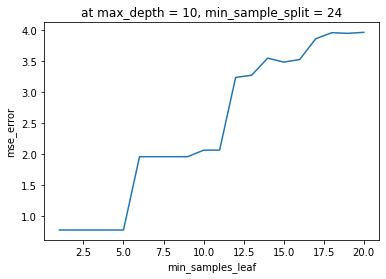

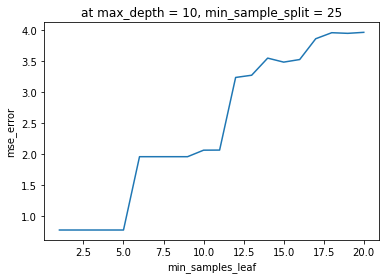

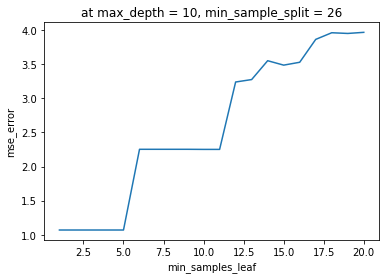

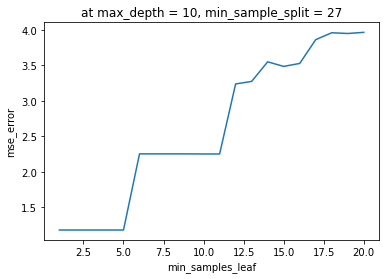

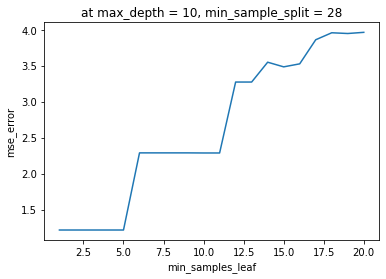

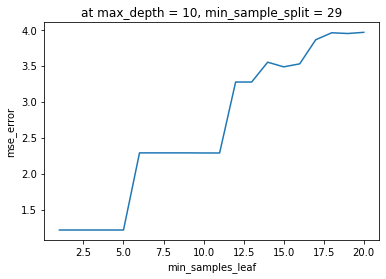

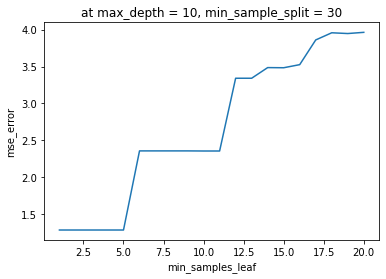

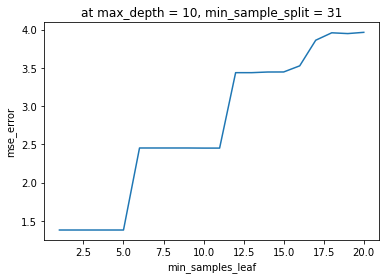

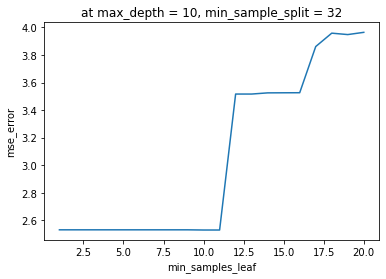

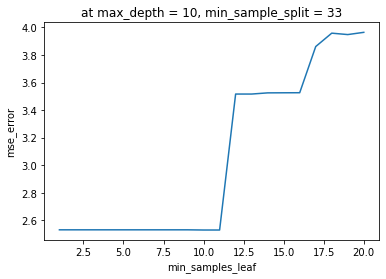

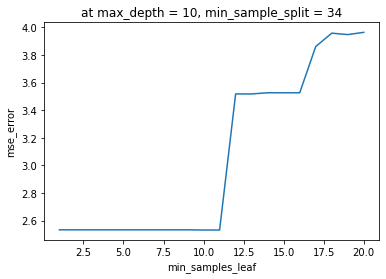

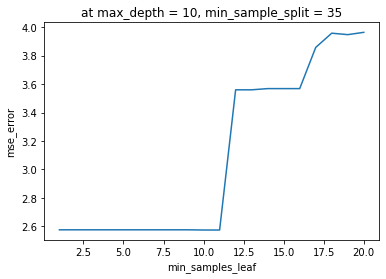

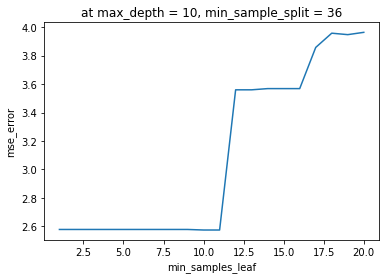

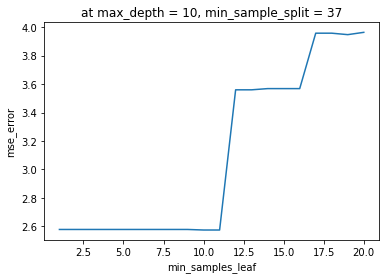

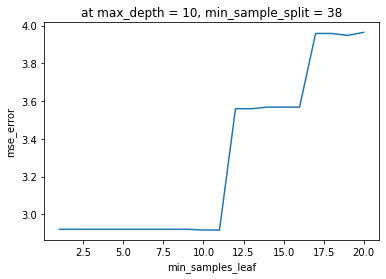

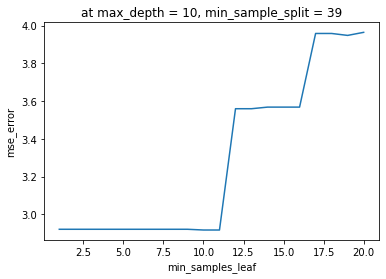

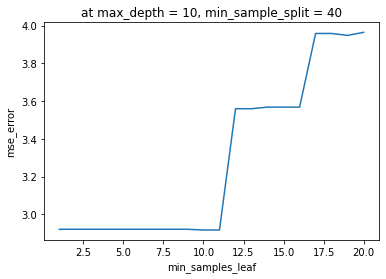

In [16]:
min_mse = 100
min_mse_depth = 1; min_mse_split = 1; min_mse_leaf = 1
mseListDepths = []
for Depth in range(1, 11):
    mseListSplits = []
    for Split in range(2, 41):
        mseListLeafs = [[], []]
        for Leaf in range(1, 21):
            mse_value = trainer(train_X, train_y, val_X, val_y, Depth, Split, Leaf)
            if  mse_value < min_mse:
                min_mse = mse_value
                min_mse_depth = Depth; min_mse_split = Split; min_mse_leaf = Leaf
                
            mseListLeafs[0].append(mse_value)
            mseListLeafs[1].append(Leaf)
        mseListSplits.append([mseListLeafs, f'at max_depth = {Depth}, min_sample_split = {Split}'])
    mseListDepths.append(mseListSplits)
    
for depth in mseListDepths:
        for coordinates, Title in depth:
            y_coords = coordinates[0]
            x_coords = coordinates[1]
            
            plt.ylabel('mse_error')
            plt.xlabel('min_samples_leaf')
            plt.title(Title)
            plt.plot(x_coords, y_coords)
            plt.show()

In [17]:
min_mse

0.24173506673554462

In [18]:
min_mse_depth, min_mse_split, min_mse_leaf

(8, 4, 1)

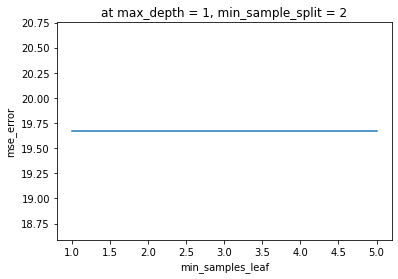

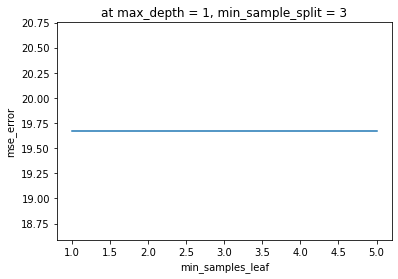

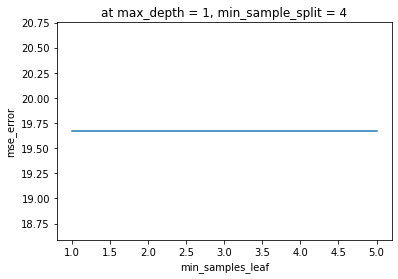

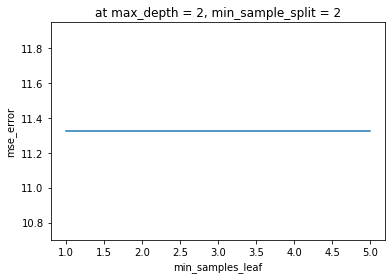

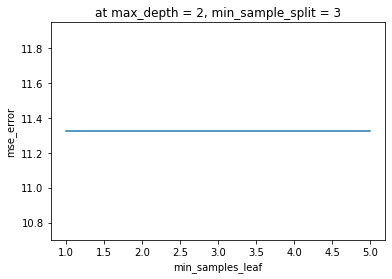

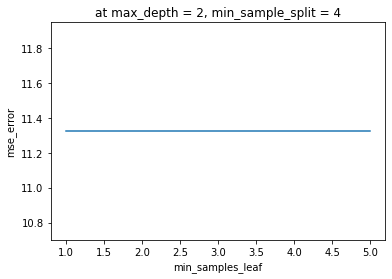

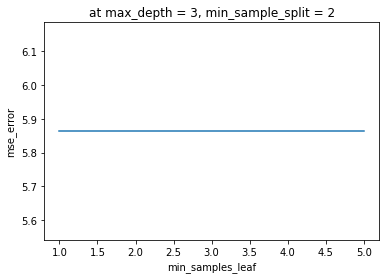

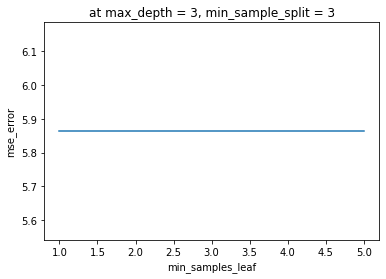

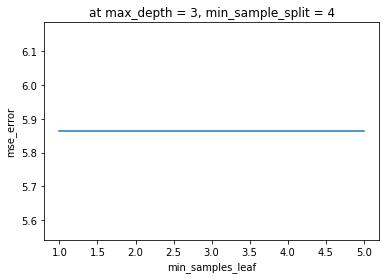

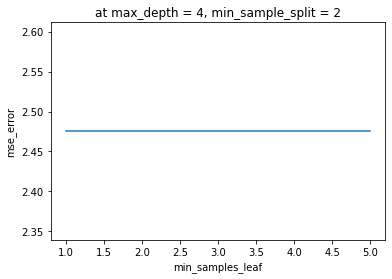

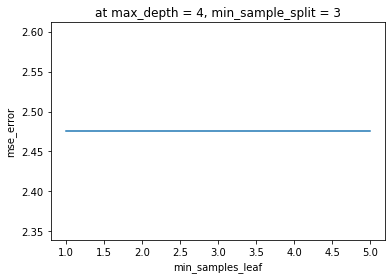

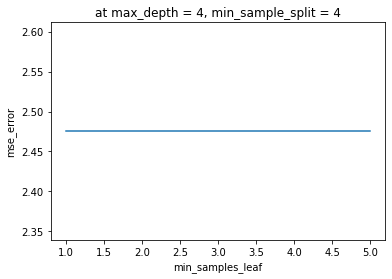

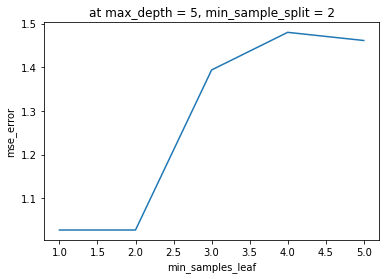

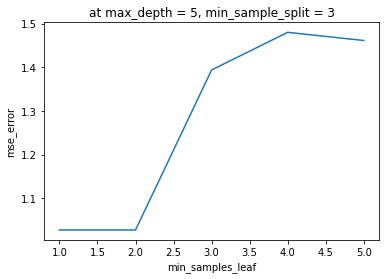

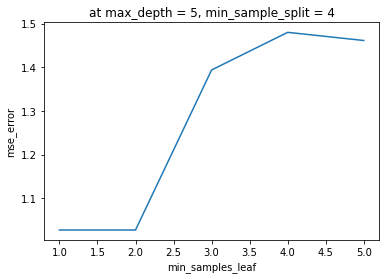

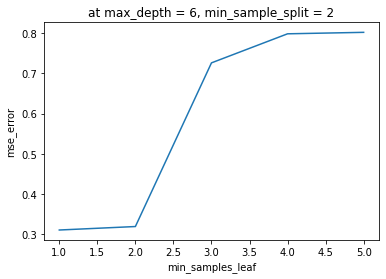

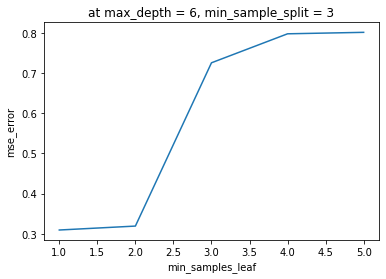

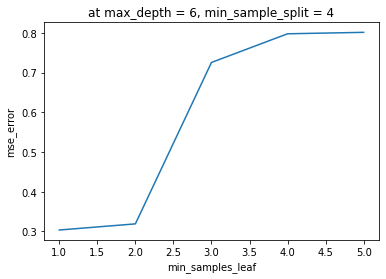

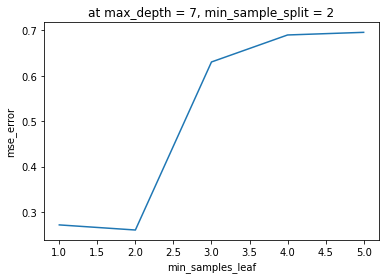

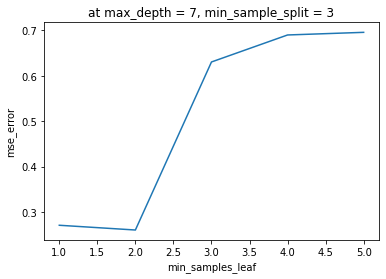

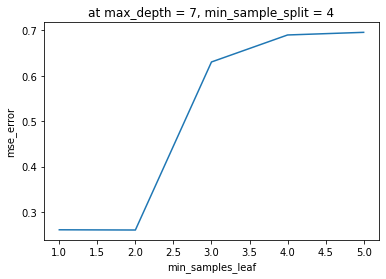

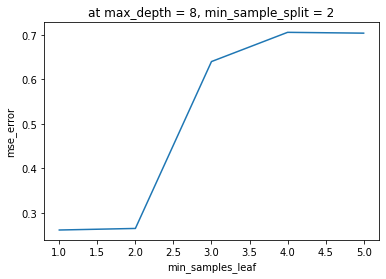

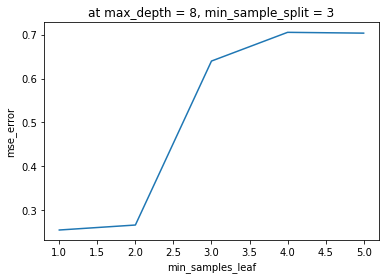

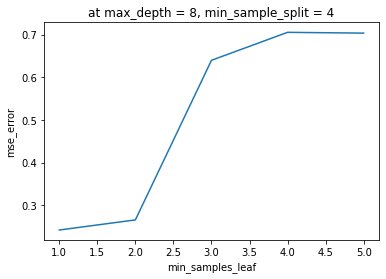

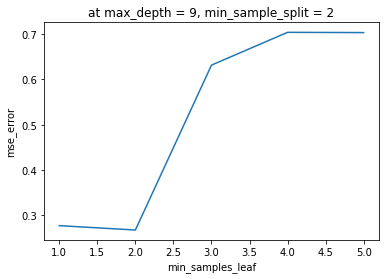

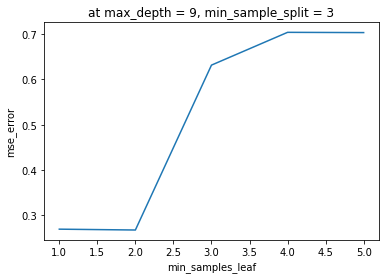

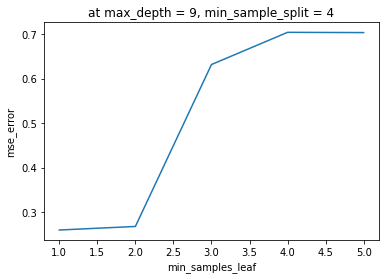

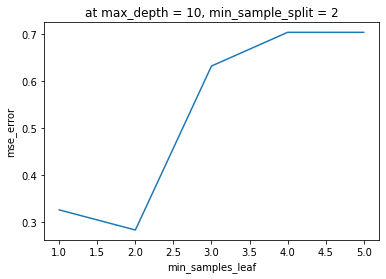

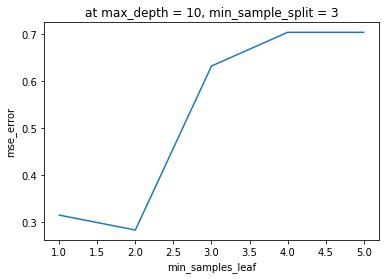

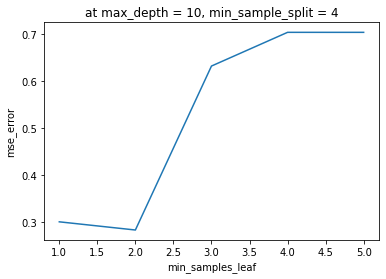

In [19]:
mseListDepths = []
for Depth in range(1, 11):
    mseListSplits = []
    for Split in range(2, 5):
        mseListLeafs = [[], []]
        for Leaf in range(1, 6):
            mse_value = trainer(train_X, train_y, val_X, val_y, Depth, Split, Leaf)
            mseListLeafs[0].append(mse_value)
            mseListLeafs[1].append(Leaf)
        mseListSplits.append([mseListLeafs, f'at max_depth = {Depth}, min_sample_split = {Split}'])
    mseListDepths.append(mseListSplits)
    
for depth in mseListDepths:
        for coordinates, Title in depth:
            y_coords = coordinates[0]
            x_coords = coordinates[1]
            
            plt.ylabel('mse_error')
            plt.xlabel('min_samples_leaf')
            plt.title(Title)
            plt.plot(x_coords, y_coords)
            plt.show()

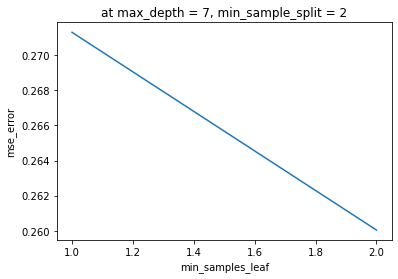

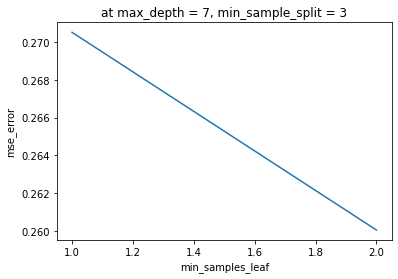

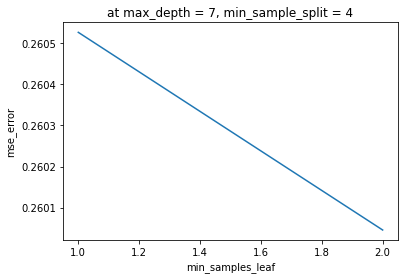

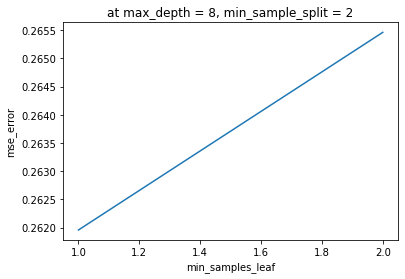

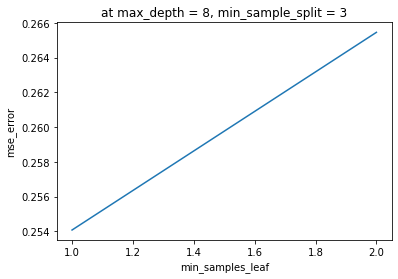

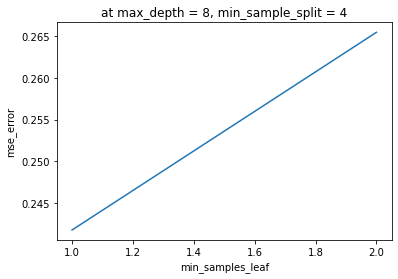

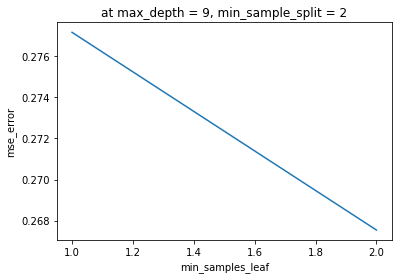

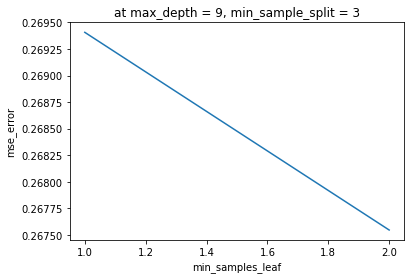

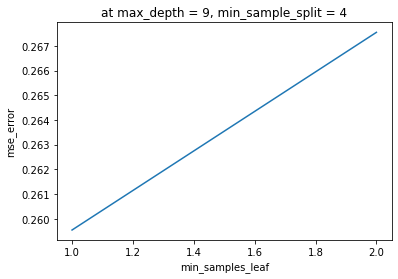

In [20]:
mseListDepths = []
for Depth in range(7, 10):
    mseListSplits = []
    for Split in range(2, 5):
        mseListLeafs = [[], []]
        for Leaf in range(1, 3):
            mse_value = trainer(train_X, train_y, val_X, val_y, Depth, Split, Leaf)
            mseListLeafs[0].append(mse_value)
            mseListLeafs[1].append(Leaf)
        mseListSplits.append([mseListLeafs, f'at max_depth = {Depth}, min_sample_split = {Split}'])
    mseListDepths.append(mseListSplits)
    
for depth in mseListDepths:
        for coordinates, Title in depth:
            y_coords = coordinates[0]
            x_coords = coordinates[1]
            
            plt.ylabel('mse_error')
            plt.xlabel('min_samples_leaf')
            plt.title(Title)
            plt.plot(x_coords, y_coords)
            plt.show()

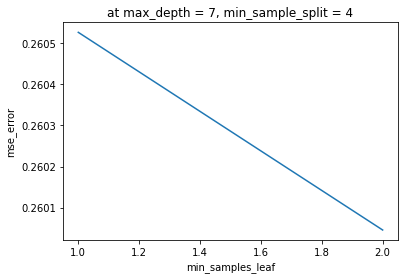

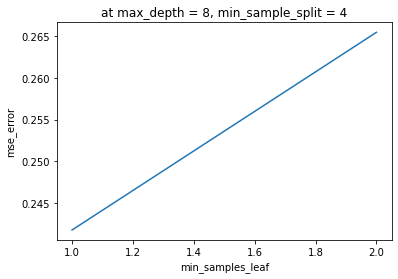

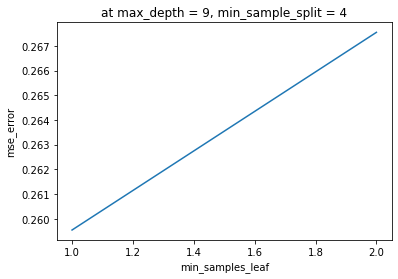

In [21]:
mseListDepths = []
for Depth in range(7, 10):
    mseListSplits = []
    for Split in range(4, 5):
        mseListLeafs = [[], []]
        for Leaf in range(1, 3):
            mse_value = trainer(train_X, train_y, val_X, val_y, Depth, Split, Leaf)
            mseListLeafs[0].append(mse_value)
            mseListLeafs[1].append(Leaf)
        mseListSplits.append([mseListLeafs, f'at max_depth = {Depth}, min_sample_split = {Split}'])
    mseListDepths.append(mseListSplits)
    
for depth in mseListDepths:
        for coordinates, Title in depth:
            y_coords = coordinates[0]
            x_coords = coordinates[1]
            
            plt.ylabel('mse_error')
            plt.xlabel('min_samples_leaf')
            plt.title(Title)
            plt.plot(x_coords, y_coords)
            plt.show()

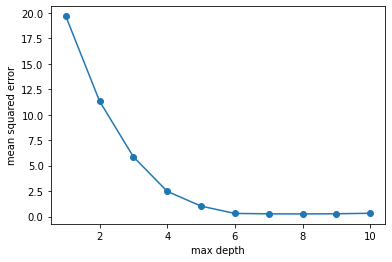

In [22]:
mse_arr = []
depth_arr = []
for i in range(1, 11):
    mse_arr.append(trainer(train_X, train_y, val_X, val_y, max_depth=i))
    depth_arr.append(i)
    
plt.plot(depth_arr, mse_arr, '-o')
plt.xlabel('max depth')
plt.ylabel('mean squared error')
plt.show()

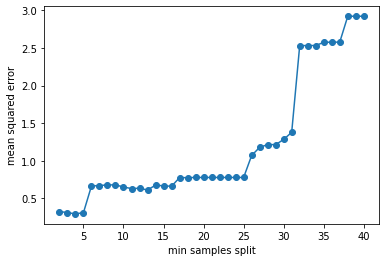

In [23]:
mse_arr = []
split_arr = []
for i in range(2, 41):
    mse_arr.append(trainer(train_X, train_y, val_X, val_y, min_samples_split=i))
    split_arr.append(i)
    
plt.plot(split_arr, mse_arr, '-o')
plt.xlabel('min samples split')
plt.ylabel('mean squared error')
plt.show()

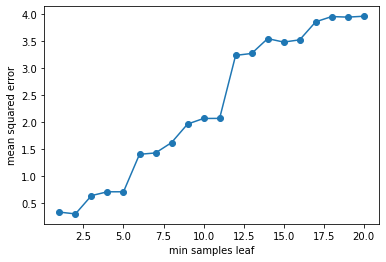

In [24]:
mse_arr = []
leaf_arr = []
for i in range(1, 21):
    mse_arr.append(trainer(train_X, train_y, val_X, val_y, min_samples_leaf=i))
    leaf_arr.append(i)
    
plt.plot(leaf_arr, mse_arr, '-o')
plt.xlabel('min samples leaf')
plt.ylabel('mean squared error')
plt.show()

## Cross Validation using the optimal hyper-parameters

### Hold-out Cross Validation

In [25]:
def hold_out_cv(X, y, depth=None, split=2, leaf=1):
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
    model = DecisionTreeRegressor(random_state=0, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
    model.fit(train_X, train_y)
    score = model.score(test_X, test_y)
    print(score)

hold_out_cv(X, y, 8, 4, 1)

0.9967314632479397


### 5-Fold Cross Validation

In [26]:
def kfold_cv(X, y, depth=None, split=2, leaf=1):
    model = DecisionTreeRegressor(random_state=0, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
    kf = KFold(n_splits=5)
    cv_score = cross_val_score(model, X, y, cv=kf)
    # print(cv_score)
    print(cv_score.mean())

kfold_cv(X, y, 8, 4, 1)

0.964484164972087


### Repeated 5-Fold Cross Validation

In [27]:
def repeated_kfold_cv(X, y, depth=None, split=2, leaf=1):
    model = DecisionTreeRegressor(random_state=0, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
    rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
    cv_score = cross_val_score(model, X, y, cv=rkf)
    # print(cv_score)
    print(cv_score.mean())
    
repeated_kfold_cv(X, y, 8, 4, 1)

0.9970735255151203


## Plotting the Decision Tree

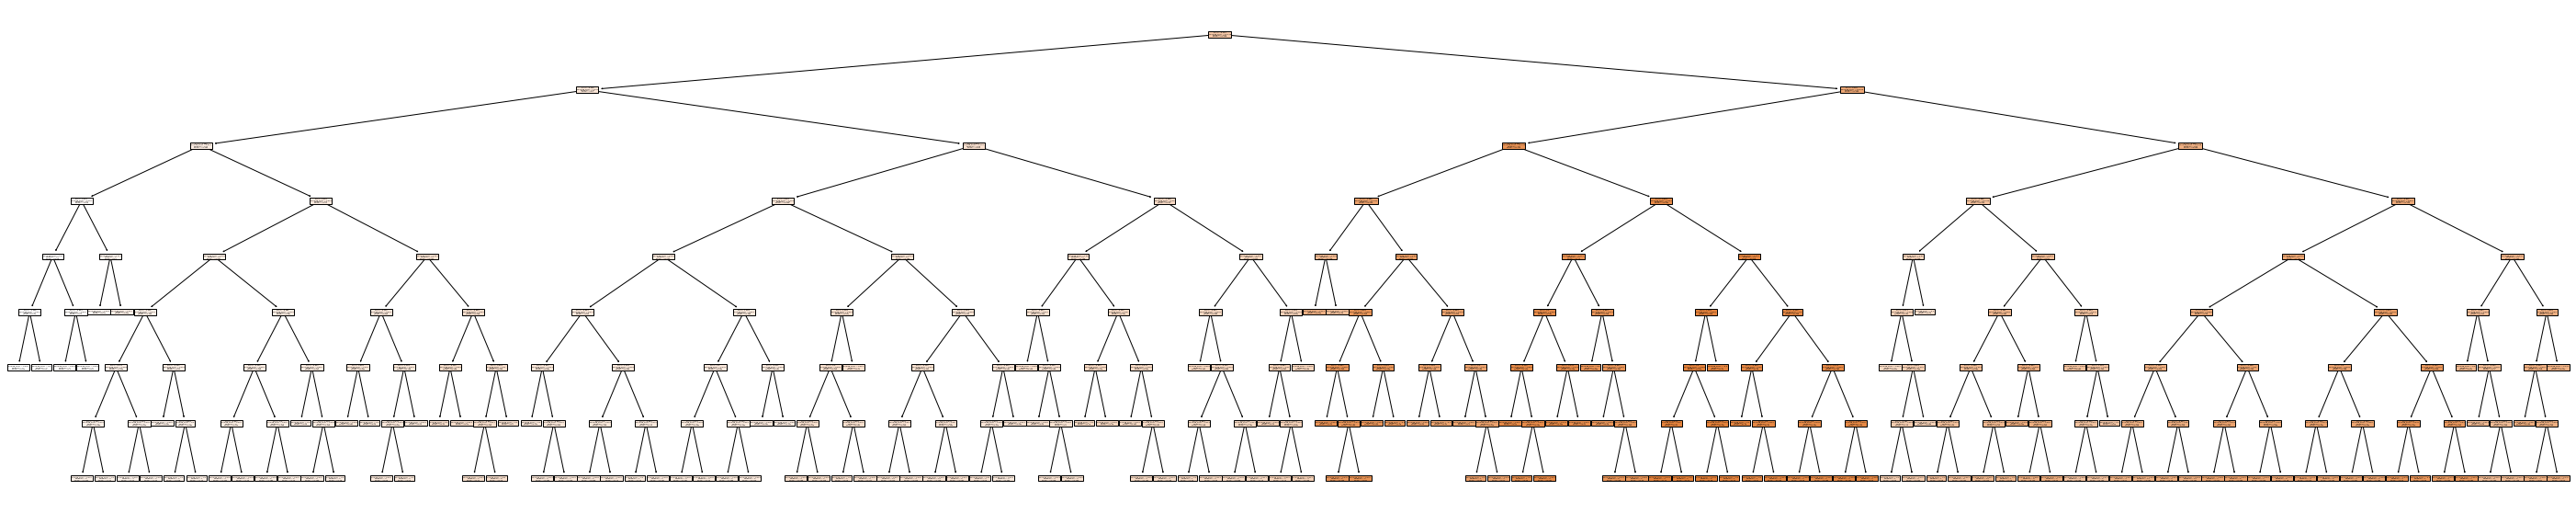

In [28]:
model = DecisionTreeRegressor(random_state=0, max_depth=8, min_samples_split=4, min_samples_leaf=1)
model.fit(train_X, train_y)
plt.figure(figsize=(50,10))
plot_tree(model, feature_names=features, filled=True);

## L1 & L2

In [29]:
def model_using_criterion(train_X, train_y, test_X, test_y, criterion="squared_error", depth=None, split=2, leaf=1):
    model = DecisionTreeRegressor(criterion=criterion, random_state=0, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
    model.fit(train_X, train_y)
    score = model.score(test_X, test_y)
    print(score)

In [30]:
model_using_criterion(train_X, train_y, test_X, test_y, criterion="absolute_error", depth=8, split=4, leaf=1)

0.9968784329885061


In [31]:
model_using_criterion(train_X, train_y, test_X, test_y, criterion="squared_error", depth=8, split=4, leaf=1)

0.9967910147197749


---
# Question-2 (Classification)
---

## Preprocessing and splitting the Iris-Dataset

In [32]:
df = pd.read_csv('iris.data.csv')
df

sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

### Preprocessing

In [33]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [34]:
for each in df.columns:
    print('Number of unique entries in', each, ':', len(df[each].unique()))

Number of unique entries in sepal length : 35
Number of unique entries in sepal width : 23
Number of unique entries in petal length : 43
Number of unique entries in petal width : 22
Number of unique entries in class : 3


In [35]:
features = ['petal length', 'petal width']
X = df[features]

### Encoding categorical variables in the Labels

In [36]:
y = df['class']
y = y.astype('category')
y = y.cat.codes

### Splitting the dataset

In [37]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

## Training a Decision Tree Classifier (max depth=2) on the pre-processed dataset

In [38]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=2)

## Implementing a function to plot the decision boundary

In [39]:
def plot_decision_boundary(classifier, train_X, train_y, feature1, feature2):
    h = 0.02
    
    xf1 = train_X[feature1].to_numpy()
    xf2 = train_X[feature2].to_numpy()
    train_y = train_y.to_numpy()
    
    x_min, x_max = xf1.min() - 10*h, xf1.max() + 10*h
    y_min, y_max = xf2.min() - 10*h, xf2.max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    
    plt.scatter(xf1, xf2, c=train_y, edgecolors='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

### Plotting the decision boundary

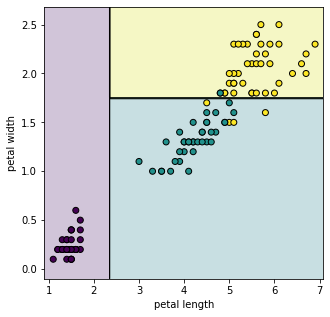

In [40]:
plot_decision_boundary(dt, train_X, train_y, 'petal length', 'petal width')

## Removing the widest Iris-Versicolor from the iris training set and training a new Decision Tree

In [41]:
df = pd.read_csv('iris.data.csv')

In [42]:
df[df['petal length'] == 4.8]

sepal length  sepal width  petal length  petal width            class
70            5.9          3.2           4.8          1.8  Iris-versicolor
76            6.8          2.8           4.8          1.4  Iris-versicolor
126           6.2          2.8           4.8          1.8   Iris-virginica
138           6.0          3.0           4.8          1.8   Iris-virginica

In [43]:
features = ['petal length', 'petal width']
X = df[features]

In [44]:
y = df['class']
y = y.astype('category')
y = y.cat.codes

In [45]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
train_X[train_X['petal length'] == 4.8]

petal length  petal width
138           4.8          1.8
70            4.8          1.8

In [47]:
train_X = train_X.drop(138)
train_y = train_y.drop(138)

### Training a Decision Tree and plotting the decision boundaries

In [48]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=2)

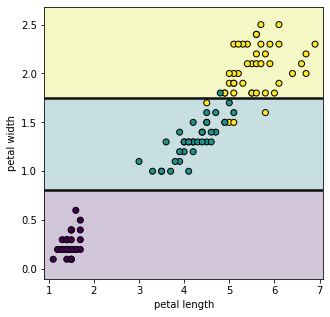

In [49]:
plot_decision_boundary(dt, train_X, train_y, 'petal length', 'petal width')

## Training a Decision Tree Classifier (with max-depth = None) on the pre-processed dataset

In [50]:
df = pd.read_csv('iris.data.csv')

In [51]:
features = ['petal length', 'petal width']
X = df[features]

In [52]:
y = df['class']
y = y.astype('category')
y = y.cat.codes

### Training a Decision Tree and plotting the decision boundaries

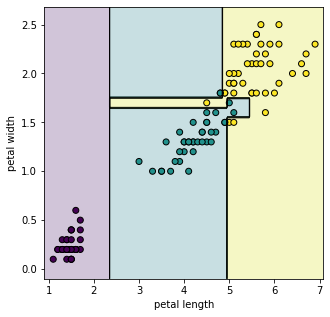

In [53]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

dt = DecisionTreeClassifier(max_depth=None)
dt.fit(train_X, train_y)

plot_decision_boundary(dt, train_X, train_y, 'petal length', 'petal width')

## Random Dataset Creation

In [54]:
X1_list = []
for i in range(100):
    X1_list.append(round(random.uniform(0.01, 2.49), 3))
    X1_list.append(round(random.uniform(2.50, 4.99), 3))
    
random.shuffle(X1_list)

In [55]:
X2_list = []
for i in range(200):
    X2_list.append(round(random.uniform(0.01, 4.99), 3))
    
random.shuffle(X2_list)

In [56]:
y_list = []
for i in range(200):
    if X1_list[i] < 2.5:
        y_list.append(0)
    else:
        y_list.append(1)

In [57]:
data = {'X1': X1_list, 'X2': X2_list, 'y': y_list}
df = pd.DataFrame(data)

In [58]:
df

X1     X2  y
0    0.265  1.612  0
1    0.400  2.251  0
2    3.867  0.031  1
3    0.803  2.767  0
4    3.650  1.006  1
..     ...    ... ..
195  3.462  4.624  1
196  3.768  1.809  1
197  2.930  2.466  1
198  2.705  3.816  1
199  2.942  3.304  1

[200 rows x 3 columns]

In [59]:
features = ['X1', 'X2']
X = df[features]

y = df.y

### Training a decision tree and plotting the decision boundaries

In [60]:
model_1 = DecisionTreeClassifier(max_depth=2)
model_1.fit(X, y)

DecisionTreeClassifier(max_depth=2)

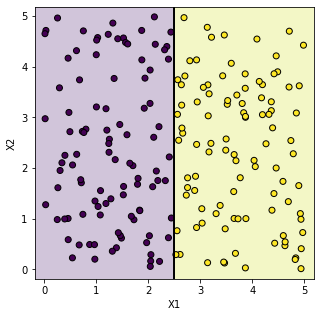

In [61]:
plot_decision_boundary(model_1, X, y, 'X1', 'X2')

### Rotating the datapoints by 45° in clockwise direction about the origin

In [62]:
data_points_matrix = np.array([X1_list, X2_list])

In [63]:
rad45 = math.radians(45)
cos45 = math.cos(rad45)
sin45 = math.sin(rad45)

In [64]:
rotation_matrix = np.array([[cos45, -sin45], [sin45, cos45]])

In [65]:
rotated_data_points_matrix = (data_points_matrix.T @ rotation_matrix).T

In [66]:
rotated_X1_list = rotated_data_points_matrix[0]
rotated_X2_list = rotated_data_points_matrix[1]

In [67]:
df = pd.DataFrame({'X1': rotated_X1_list, 'X2': rotated_X2_list, 'y': y_list})

In [68]:
df

X1        X2  y
0    1.327239  0.952473  0
1    1.874540  1.308855  0
2    2.756302 -2.712462  1
3    2.524371  1.388758  0
4    3.292289 -1.869590  1
..        ...       ... ..
195  5.717665  0.821658  1
196  3.943535 -1.385222  1
197  3.815548 -0.328098  1
198  4.611043  0.785596  1
199  4.416589  0.255973  1

[200 rows x 3 columns]

In [69]:
features = ['X1', 'X2']
X = df[features]

y = df.y

### Training another Decision Tree classifier and plotting the decision boundaries

In [70]:
model_2 = DecisionTreeClassifier(max_depth=2)
model_2.fit(X, y)

DecisionTreeClassifier(max_depth=2)

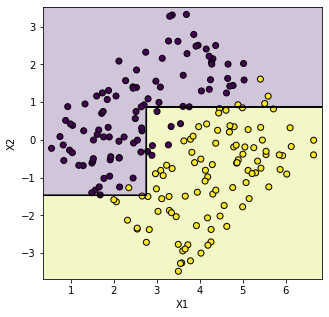

In [71]:
plot_decision_boundary(model_2, X, y, 'X1', 'X2')

---
# Question-2 (Regression)
---

In [72]:
df = pd.read_csv('task.csv')
df

X         Y
0    0.374540 -0.005042
1    0.950714  0.835799
2    0.731994  0.244592
3    0.598658 -0.032501
4    0.156019  0.659870
..        ...       ...
195  0.349210 -0.049795
196  0.725956  0.132379
197  0.897110  0.609442
198  0.887086  0.630434
199  0.779876  0.460857

[200 rows x 2 columns]

In [73]:
X = df.X
X = X.to_numpy()

y = df.Y
y = y.to_numpy()

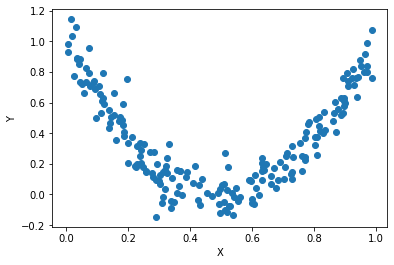

In [74]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [75]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
def sort_list(list1, list2):
    zipped_pairs = zip(list2, list1)
    z = [x for _, x in sorted(zipped_pairs)]
    return z

In [77]:
def decision_tree_regressor_line_graph(train_X, train_y, test_X, test_y, depth=None, leaf=1):
    train_X = train_X.reshape(-1, 1)
    test_X = test_X.reshape(-1, 1)
    model = DecisionTreeRegressor(random_state=0, max_depth=depth, min_samples_leaf=leaf)
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    
    plt.scatter(test_X, test_y, color='green')
    
    pred_y = sort_list(pred_y, test_X)
    test_X = sorted(test_X)
    
    plt.plot(test_X, pred_y, 'red')
    
    plt.title(f'at max_depth = {depth}, min_samples_leaf = {leaf}')
    plt.show()

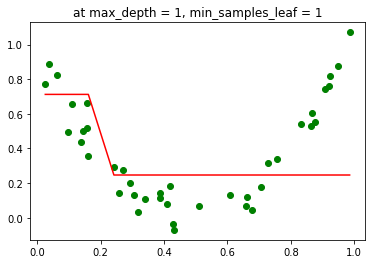

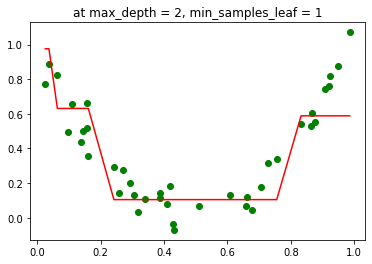

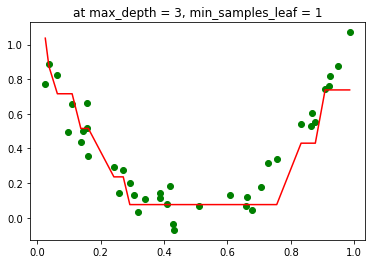

In [78]:
for depth in range(1, 4):
    decision_tree_regressor_line_graph(train_X, train_y, test_X, test_y, depth=depth)

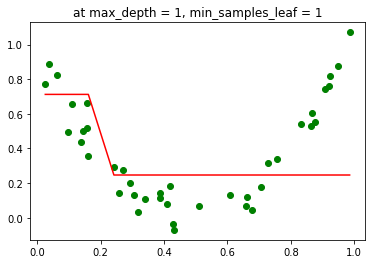

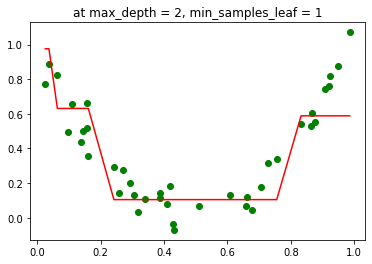

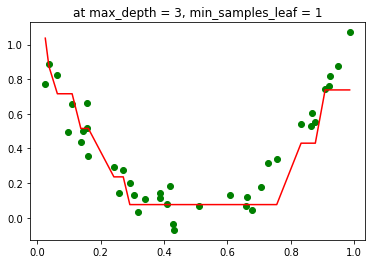

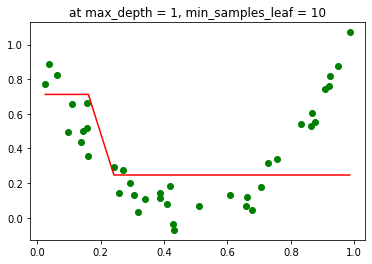

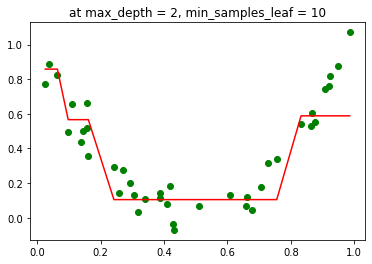

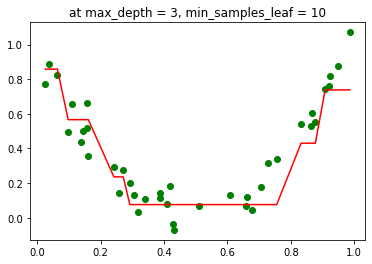

In [79]:
for leaf in range(1, 11, 9):
    decision_tree_regressor_line_graph(train_X, train_y, test_X, test_y, depth=1, leaf=leaf)
    decision_tree_regressor_line_graph(train_X, train_y, test_X, test_y, depth=2, leaf=leaf)
    decision_tree_regressor_line_graph(train_X, train_y, test_X, test_y, depth=3, leaf=leaf)

---
# Q3
---

### Loading dataset

In [80]:
df = load_penguins()

In [81]:
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

### Checking the number of NaN values in each feature

In [82]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### Dropping the NaN containing rows  
(Since they were significantly less)

In [83]:
df = df.dropna(axis=0)

In [84]:
features = df.columns.tolist()[1:]

In [85]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [86]:
for each in df.columns:
    print('Number of unique entries in', each, ':', len(df[each].unique()))

Number of unique entries in species : 3
Number of unique entries in island : 3
Number of unique entries in bill_length_mm : 163
Number of unique entries in bill_depth_mm : 79
Number of unique entries in flipper_length_mm : 54
Number of unique entries in body_mass_g : 93
Number of unique entries in sex : 2
Number of unique entries in year : 3


In [87]:
categorical_features = ['species', 'island', 'sex', 'year']
non_categorical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

### Visualization

In [88]:
def plot_categorical_features(df, feature_name):
    count_dict = df[feature_name].value_counts().to_dict()
    feature_keys = list(map(str, list(count_dict.keys())))
    feature_values = list(count_dict.values())
    plt.bar(feature_keys, feature_values)
    plt.xlabel(str(feature_name))
    plt.ylabel('Number of values')
    plt.show()

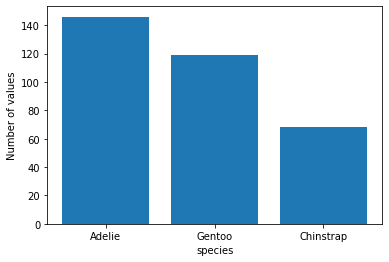

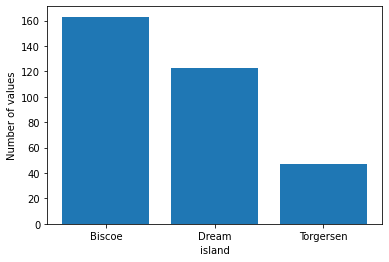

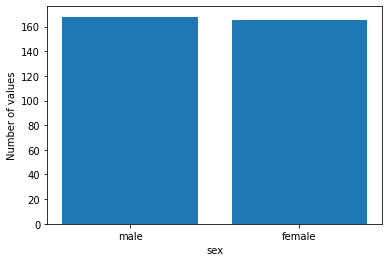

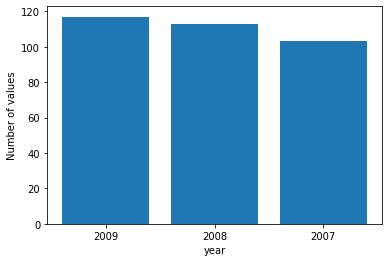

In [89]:
for each in categorical_features:
    plot_categorical_features(df, each)

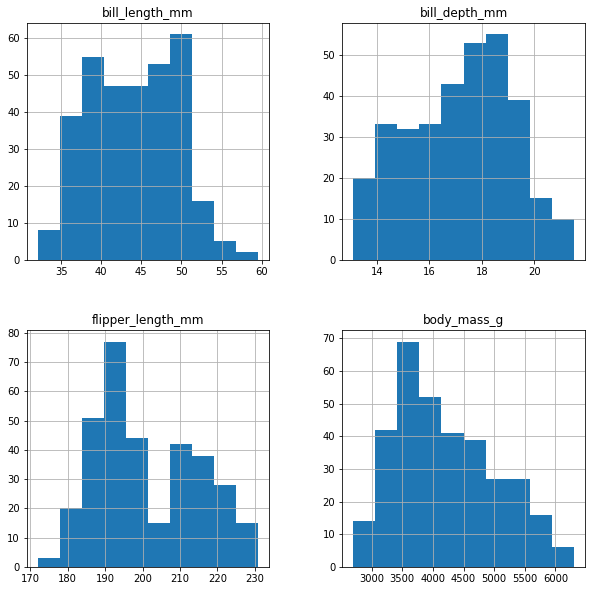

In [90]:
df[non_categorical_features].hist(figsize=(10,10))
plt.show()

### Encoding categorical features

In [91]:
for each in categorical_features:
    df[each] = df[each].astype('category')
    df[each] = df[each].cat.codes

In [92]:
df

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       2            39.1           18.7              181.0   
1          0       2            39.5           17.4              186.0   
2          0       2            40.3           18.0              195.0   
4          0       2            36.7           19.3              193.0   
5          0       2            39.3           20.6              190.0   
..       ...     ...             ...            ...                ...   
339        1       1            55.8           19.8              207.0   
340        1       1            43.5           18.1              202.0   
341        1       1            49.6           18.2              193.0   
342        1       1            50.8           19.0              210.0   
343        1       1            50.2           18.7              198.0   

     body_mass_g  sex  year  
0         3750.0    1     0  
1         3800.0    0     0  
2         3250.0    0     0  
4         3450.0    0     0  
5         3650.0    1     0  
..           ...  ...   ...  
339       4000.0    1     2  
340       3400.0    0     2  
341       3775.0    1     2  
342       4100.0    1     2  
343       3775.0    0     2  

[333 rows x 8 columns]

In [93]:
X = df[features]
y = df['species']

### Normalization

In [94]:
def normalize(df, feature):
    f_mean = df[feature].mean()
    f_std = df[feature].std()
    df[feature] = (df[feature]-f_mean)/f_std
    return df

In [95]:
for each in non_categorical_features:
    X = normalize(X, each)

In [96]:
X

island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0         2       -0.894695       0.779559          -1.424608    -0.567621   
1         2       -0.821552       0.119404          -1.067867    -0.505525   
2         2       -0.675264       0.424091          -0.425733    -1.188572   
4         2       -1.333559       1.084246          -0.568429    -0.940192   
5         2       -0.858123       1.744400          -0.782474    -0.691811   
..      ...             ...            ...                ...          ...   
339       1        2.159064       1.338151           0.430446    -0.257145   
340       1       -0.090112       0.474872           0.073705    -1.002287   
341       1        1.025333       0.525653          -0.568429    -0.536573   
342       1        1.244765       0.931902           0.644491    -0.132954   
343       1        1.135049       0.779559          -0.211688    -0.536573   

     sex  year  
0      1     0  
1      0     0  
2      0     0  
4      0     0  
5      1     0  
..   ...   ...  
339    1     2  
340    0     2  
341    1     2  
342    1     2  
343    0     2  

[333 rows x 7 columns]

### Test/Train Split

In [97]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

### Entropy Loss

In [98]:
def entropy_loss(y):
    '''
    Returns the entropy for the given node
    '''
    probs = y.value_counts().to_numpy()/len(y)
    entropy = 0
    for each in probs:
        entropy += each * math.log2(each)
        
    return -entropy

In [99]:
def information_gain(y, y_left, y_right):
    '''
    Returns information gain for the given node and its branches
    '''
    total_datapoints = len(y)
    left_weight = len(y_left)/total_datapoints
    right_weight = (len(y_right))/total_datapoints

    return entropy_loss(y) - \
        ( left_weight*entropy_loss(y_left) + right_weight*entropy_loss(y_right) )

### Implementing the decision function to make the split (converting continuous variables to categorical variables)

In [100]:
def cont_to_cat(train_X, train_y):
    '''
    Decision Function that returns the best possible split
    (Continuous variables to Continuous variables conversion)
    '''
    split = {}
    info_gain = -1

    features = train_X.columns.tolist()
    for Feature in features:
        possible_thresholds = train_X[Feature].unique()
        
        for Threshold in possible_thresholds:
            # left branch
            left_branch_X = train_X[train_X[Feature] <= Threshold]
            left_branch_y = train_y[train_X[Feature] <= Threshold]

            # right branch
            right_branch_X = train_X[train_X[Feature] > Threshold]
            right_branch_y = train_y[train_X[Feature] > Threshold]

            if len(left_branch_X > 0) and len(right_branch_X > 0):
                current_info_gain = information_gain(train_y, left_branch_y, right_branch_y)

                if current_info_gain > info_gain:
                    split['feature'] = Feature
                    split['threshold'] = Threshold
                    split['left_branch_X'] = left_branch_X
                    split['left_branch_y'] = left_branch_y
                    split['right_branch_X'] = right_branch_X
                    split['right_branch_y'] = right_branch_y
                    split['info_gain'] = current_info_gain
                    info_gain = current_info_gain

    return split

### Decision Tree Implementation

In [101]:
def Node(feature=None, left=None, right=None, threshold=None, value=None):
    '''
    Constructor for each node of the Decision Tree
    '''
    return {'feature': feature, 'left': left, 'right': right, 'threshold': threshold, 'value': value}

In [102]:
def tree(train_X, train_y, current_depth=0, max_depth=2, min_sample_split=2):
    '''
    Recursive function that creates the Decision Tree
    '''
    num_datapoints = len(train_X)
        
    if (num_datapoints >= min_sample_split) and (current_depth <= max_depth):
        split = cont_to_cat(train_X, train_y)

        if split['info_gain'] > 0:
            left_branch = tree(split['left_branch_X'], split['left_branch_y'], current_depth+1)
            right_branch = tree(split['right_branch_X'], split['right_branch_y'], current_depth+1)

            return Node(feature=split['feature'], left=left_branch, right=right_branch, threshold=split['threshold'])

    # in case of leaf node
    leaf_value = max(train_y)
    return Node(value=leaf_value)

In [103]:
def train(train_X, train_y, max_depth=2, min_sample_split=2):
    '''
    Function for training the Decision Tree using the training dataset
    Returns root node of the Decision Tree
    '''
    return tree(train_X, train_y, max_depth=max_depth, min_sample_split=min_sample_split)

In [104]:
def predict(test_X, node):
        '''
        Predicts the class for a single data point
        (Recursive Function)
        '''
        if node['value'] != None:
            return node['value']
        
        node_feature = test_X[node['feature']]
        if node_feature <= node['threshold']:
            return predict(test_X, node['left'])
        else:
            return predict(test_X, node['right'])

In [105]:
def test(test_X, test_y, root_node):
        '''
        Returns the predictions and accuracy scored for the test dataset
        '''
        pred_y = []
        Test_y = test_y.tolist()
        for x in range(len(test_X)):
            pred_y.append(predict(test_X.iloc[x], root_node))
            
        print('True Values:', Test_y)
        print()
        print('Predictions:', pred_y)
        print()
        
        accuracy = 0
        for each in range(len(pred_y)):
            if pred_y[each] == Test_y[each]:
                accuracy += 1
        accuracy /= len(test_X)
        print('Accuracy:', accuracy)
        
        classwise_accuracy = 0
        classes = test_y.unique()
        classwise_true_pos_count = {}
        for Class in classes:
            classwise_true_pos_count[Class] = 0
            
        classwise_count = test_y.value_counts().to_dict()
        
        for each in range(len(pred_y)):
            if pred_y[each] == Test_y[each]:
                Class = Test_y[each]
                classwise_true_pos_count[Class] += 1
        
        for Class in classes:
            classwise_accuracy += classwise_true_pos_count[Class]/classwise_count[Class]
        
        classwise_accuracy /= len(classes)
        print('Classwise Accuracy:', classwise_accuracy)

### Creation & Training of the Decision Tree Classifier

In [106]:
root_node = train(train_X, train_y, max_depth=5)

### Testing the Decision Tree Classifier

In [107]:
test(test_X, test_y, root_node)

True Values: [0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 2]

Predictions: [0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 2]

Accuracy: 0.89
Classwise Accuracy: 0.9004629629629629
